The cell below contains the imports for this program. The `from` keyword imports specific classes and functions from a package. The `as` keyword shortens the name of the module.
- The `Fraction` class from `fractions` is used to convert floating point numbers into a tuple from which a numerator and denominator can be obtained.
- The `sqrt` function from `math` is used to easily input the square root of numbers to particular functions in this program.
- The `Latex` class from `IPython.display` is used to display strings in a latex format.
- The `HTML` class from `IPython.display` is used to display HTML code.
- The `FancyArrowPatch` class from `matplotlib.patches` is used to draw the y-axis arrow and the electron arrows in the energy level diagram.
- The `plt` as `matplotlib.pyplot` module is used to draw the energy level diagram chart.
- `numpy` is imported as the shortened version `np` for matrix and eigenvalue and eigenvector calculations.
- The `DataFrame` class from `pandas` is imported to produce a formatted version of the Hamiltonian matrix.
- The `pcp` class enables access to the [PubChem database](https://pubchem.ncbi.nlm.nih.gov/) to obtain the canonical SMILES formula of the input molecule.
- The `MolFromSmiles` function from `rdkit.Chem` returns a `Mol` object from an input SMILES formula.
- The `Descriptors` class from `rdkit.Chem` is used to compute molecular descriptors, specifically in this program `NumRadicalElectrons` returns the number of radical electrons in a SMILES formula.
- The `Draw` class from `rdkit.Chem` is used to access `MolToImage` which returns a Python Imaging Library (PIL) image of a `Mol` object.

In [77]:
from fractions import Fraction #imports the fractions class from Fraction
from IPython.display import Latex, HTML #imports the Latex and HTML classes from IPython.display
from math import sqrt #imports the sqrt function from math
#import matplotlib.patches as patches #imports matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch #imports FancyArrowPatch from matplotlib.patches
import matplotlib.pyplot as plt #imports matplotlib.pyplot as plt
import numpy as np #imports the numpy module as np
from pandas import DataFrame #imports the DataFrame class from pandas
import pubchempy as pcp #imports the pubchempy module as pcp
#imports the MolFromSmiles function and Descriptors and Draw classes from rdkit.Chem
from rdkit.Chem import MolFromSmiles, Descriptors, Draw

The `verify_molecule()` function checks if the molecule name given is valid. All chemical molecule names can include alphanumeric characters as well as spaces and hyphens. This is not a perfect check for the molecule name since the order of characters could be incorrect and still return that the molecule is valid. However this function does check that the characters in the molecule name could be correct. If the input molecule name passes these checks, the program proceeds to checking the SMILES formula.

In [78]:
def verify_molecule(molecule: str): #defines the verify_molecule() function
    """
    Returns a boolean if the molecule name is valid and returns the result.

    Args:
        - molecule (str): The name of the molecule.

    Returns:
        - molecule.isalnum() (bool): If the molecule is valid.
    """
    characters_to_remove = "-, " #sets the characters to remove as spaces and hyphens
    for character in characters_to_remove: #loops each character in the characters_to_remove string
        molecule = molecule.replace(character, "") #replaces the character to remove with an empty string ""
    #returns a boolean if the molecule with spaces and hyphens removes in alphanumeric
    return molecule.isalnum()

The `manual_molecule()` function is called upon when there is not connection to the [PubChem database](https://pubchem.ncbi.nlm.nih.gov/), allowing this program to work if the user is offline or the [PubChem database](https://pubchem.ncbi.nlm.nih.gov/) is not accessible. The user is asked to enter the name of the molecule which will be used to carry out the Hückel Molecular Orbital calculations. The molecule name input is checked using the `verify_molecule()` function and is returned if valid. The user has ten attempts to enter the molecule, after which the program is aborted. If the user types cancel, the program will abort.

In [79]:
def manual_molecule(): #defines the manual_molecule() function
    """
    Returns the input of a molecule name.

    Returns:
        - molecule (str): The name of the molecule.
    """
    while_loop_counter = 10 #sets the while_loop_counter variable to 10
    while True: #initiates the while loop
        #asks the user to input the molecule name and gives them the number of attempts remaining
        molecule_input = str(input("Please enter the name of the uncharged conjugated organic molecule. If you would like to abort the program then type cancel. You have " + str(while_loop_counter) + " attempts remaining."))
        if molecule_input.lower() == "cancel": #if the user types cancel
            print("Aborting program") #prints aborting program
            break #breaks out of the loop
        if verify_molecule(molecule_input) == True: #if the input molecule name is valid
            molecule = molecule_input.lower() #sets the molecule to the input in lower case
            break #breaks out of the loop
        if verify_molecule(molecule_input) == False: #if the input molecule name is not valid
            #prints it is not valid and continues in the loop
            print("This is not a valid uncharged conjugated organic molecule, please try again")
        if while_loop_counter == 1: #if the counter gets down to 1
            break #breaks out of the loop
        while_loop_counter += -1 #reduces the while_loop_counter variable by 1
    return molecule #returns the validated molecule name

The `verify_smiles()` function checks the input SMILES formula using `RDKit`. A `Mol` object is created and the program attempts to get the number of atoms. If this is able to be done, the function returns `True` otherwise it returns `False`.

In [80]:
def verify_smiles(smiles: str): #defines the verify_smiles() function
    """
    Returns a boolean if the SMILES formula is valid.

    Args:
        - smiles (str): The SMILES formula.

    Returns:
        - bool: If the SMILES formula is valid.
    """
    mol_object = MolFromSmiles(smiles) #gets the Mol object from the smiles formula using RDKit
    #if there is a mol_object and it has at least one atom
    if mol_object is not None and mol_object.GetNumAtoms() > 0:
        return True #returns True
    else: #otherwise
        return False #returns False

The `check_smiles_charge()` function checks for the presence of charge in the input SMILES formula by looping through the `smiles` string to see there are + and/or - characters. The boolean variables `positively_charged` and `negatively_charged` are returned in a tuple.

In [81]:
def check_smiles_charge(smiles: str): #defines the check_smiles_charge() function
    """
    Returns boolean variables if the SMILES formula is positively charged and/or negatively charged.

    Args:
        - smiles (str): The SMILES formula.

    Returns:
        tuple containing:
        - positively_charged (bool): If the SMILES formula is positively charged.
        - negatively_charged (bool): If the SMILES formula is negatively charged.
    """
    positively_charged = False #sets positively_charged to False
    negatively_charged = False #sets negatively_charged to False
    for smiles_loop in range(len(smiles)): #loops for the length of the SMILES formula
        if smiles[smiles_loop] == "+": #if the character in the SMILES formula is a +
            positively_charged = True #sets positively_charged to True
        if smiles[smiles_loop] == "-": #if the character in the SMILES formula is a -
            negatively_charged = True #sets negatively_charged to True
    if positively_charged == True: #if the SMILES formula is positively charged
        #prints a statement saying its positively charged
        print("The SMILES formula " + smiles + " is positively charged")
    if negatively_charged == True: #if the SMILES formula is negatively charged
        #prints a statement saying its negatively charged
        print("The SMILES formula " + smiles + " is negatively charged")
    if positively_charged == False and negatively_charged == False: #if the SMILES formula is not charged
        #prints a statement saying the SMILES formula is not charged
        print("The SMILES formula " + smiles + " is not charged")
    #returns the two boolean variables positively_charged and negatively_charged in a tuple
    return positively_charged, negatively_charged

The `check_smiles_is_a_hydrocarbon()` function takes an input SMILES formula, removes all non alphabetical characters, converts it into all capital letters and checks that it only contains the letters C and H. `True` or `False` is returned depending on if the letters are only C's and H's.

In [82]:
def check_smiles_is_a_hydrocarbon(smiles: str): #defines the check_smiles_is_a_hydrocarbon() function
    """
    Returns a boolean if the SMILES formula is a hydrocarbon.

    Args:
        - smiles (str): The SMILES formula.

    Returns:
        - bool: If the SMILES formula is a hydrocarbon.
    """
    #removes all non-alphabetical characters from the input SMILES formula
    smiles_letters_only = "".join(character for character in smiles if character.isalpha())
    smiles_letters_only = smiles_letters_only.upper() #converts all letters to be upper case
    counter = 0 #initiates a counter variable at 0
    #loops for the length of smiles_letters_only
    for smiles_letters_loop in range(len(smiles_letters_only)):
        #if the letters of smiles_letters_only are not C and H
        if smiles_letters_only[smiles_letters_loop] != "C" and smiles_letters_only[smiles_letters_loop] != "H":
            counter += 1 #increases the counter by 1
            break #breaks out of the loop
    if counter == 0: #if the counter equals zero
        return True #returns True
    else: #otherwise
        return False #returns False

The `check_aromaticity()` function uses `RDKit` to create a `Mol` object from an input SMILES string. The number of c's is counted and tested if it is equal to the number of atoms from the `Mol` object and returned at the end. This function is required because the SMILES formula for aromatic compounds can be represented using lower case c instead of upper case C with = to represent double bonds in the canonical SMILES variant. For example, the benzene SMILES formula can be c1ccccc1 or C1=CC=CC=C1 and the SMILES formula for naphthalene can be c1c2ccccc2ccc1 or C1=CC=C2C=CC=CC2=C1.

In [83]:
def check_aromaticity(smiles: str): #defines the check_aromaticity() function
    """
    Returns a boolean if the SMILES formula is aromatic when checked for lower case c's.

    Args:
        - smiles (str): The SMILES formula.

    Returns:
        - bool: If the SMILES formula is a aromatic.
    """
    mol_object = MolFromSmiles(smiles) #uses RDKit to get the Mol object from the input SMILES formula
    #sets the aromatic_check boolean if the number of c's is equal to the number of atoms
    aromatic_check = bool(smiles.count("c") == mol_object.GetNumAtoms())
    return aromatic_check #returns the aromatic_check boolean variable

The `check_double_bond()` function checks if the input SMILES string has at least one double bond represented by = or if it is aromatic. A boolean variable `double_bond` is returned.

In [84]:
def check_double_bond(smiles: str): #defines the check_double_bond() function
    """
    Returns a boolean variable if the SMILES formula contains at least one double bond.

    Args:
        - smiles (str): The SMILES formula.

    Returns:
        - double_bond (bool): If the SMILES formula contains a double bond.
    """
    double_bond = False #sets double_bond to False
    for smiles_loop in range(len(smiles)): #loops for the length of smiles
        if smiles[smiles_loop] == "=": #if the character is smiles is equal to =
            double_bond = True #sets double_bond to True
            break #breaks
    if check_aromaticity(smiles) == True: #if smiles is aromatic
        double_bond = True #sets double_bond to True
    return double_bond #returns the boolean variable double_bond

The `essential_smiles_checks()` function accesses the boolean variables from `verify_smiles()`, `check_smiles_charge()`, `check_smiles_is_a_hydrocarbon()` and `check_double_bond()` by passing in the input SMILES formula. If SMILES formula is valid, not positively charged, not negatively charged, a hydrocarbon and contains at least one double bond then the function returns `True`. Otherwise `False` is returned. This is required such that the calculations performed on the SMILES formula passed onto later functions does not error out.

In [85]:
def essential_smiles_checks(smiles: str): #defines the essential_smiles_checks() function
    """
    Returns a boolean if the SMILES formula passes the essential SMILES checks of 
    being a valid SMILES formula, uncharged, a hydrocarbon and contains at least 
    one double bond.

    Args:
        - smiles (str): The SMILES formula.

    Returns:
        - bool: If the SMILES formula passes the essential SMILES checks.
    """
    valid_smiles = verify_smiles(smiles) #gets the boolean variable valid_smiles from verify_smiles()
    #gets the boolean variables postively_charged and negatively_charged from check_smiles_charge()
    postively_charged, negatively_charged = check_smiles_charge(smiles)
    #gets the boolean variable hydrocarbon_smiles from check_smiles_is_a_hydrocarbon()
    hydrocarbon_smiles = check_smiles_is_a_hydrocarbon(smiles)
    double_bond = check_double_bond(smiles) #gets the boolean variable double_bond from check_double_bond()
    #if the input SMILES formula is valid, not charged, a hydrocarbon and has at least one double bond
    if valid_smiles == True and postively_charged == False and negatively_charged == False and hydrocarbon_smiles == True and double_bond == True:
        return True #returns True
    else: #otherwise
        return False #returns False

The `manual_smiles()` function asks the user to input a SMILES formula for the input molecule name. This is done in the event that there is not a connection to the [PubChem database](https://pubchem.ncbi.nlm.nih.gov/). If the user enters a SMILES formula which returns `True` from the `essential_smiles_checks()` function, the smiles variable is returned, otherwise the user is asked to input a valid SMILES formula again. The user has ten attempts to do this. If these attempts run out or if the types in the word cancel, the program is aborted.

In [86]:
def manual_smiles(molecule: str): #defines the manual_smiles() function
    """
    Returns a manually entered SMILES formula for the input molecule name.

    Args:
        - molecule (str): The name of the molecule.

    Returns:
        - smiles (str): The SMILES formula.
    """
    while_loop_counter = 10 #sets the while_loop_counter variable to 10
    while True: #initiates the while loop
        #asks the user to input a SMILES formula for the molecule name
        #The user is given some examples of valid SMILES formula and the remaining attempts are displayed
        smiles_input = str(input("Please enter the SMILES formula for " + molecule.lower() + ". Here are some examples of SMILES formulae of conjugated molecules: Benzene: c1ccccc1, Butadiene: C=CC=C2, 5-Dimethyl-2,4-hexadiene: CC(=CC=C(C)C)C. If you would like to abort the program then type cancel. You have " + str(while_loop_counter) + " attempts remaining."))
        if smiles_input.lower() == "cancel": #if the lowercase smiles_input is cancel
            break #breaks out of the loop
        #if smiles_input when passed into essential_smiles_checks() returns True
        if essential_smiles_checks(smiles_input) == True:
            smiles = smiles_input #sets the smiles variable equal to smiles_input
            break #breaks out of the loop
        else: #otherwise
            #prints a statement saying the smiles_input is not valid
            print("This is not a valid uncharged organic SMILES formula containing at least one double bond, please try again")
        if while_loop_counter == 1: #if the while_loop_counter reaches 1
            print("Aborting program after 10 attempts") #prints aborting the program
            break #breaks out of the loop   
        while_loop_counter += -1 #reduces the while_loop_counter variable by 1
    return smiles #returns the smiles variable

The `get_smiles()` function returns a tuple containing the SMILES formula and validated molecule name for the input molecule name. The preference is to obtain the SMILES formula using `pubchempy` by acccessing the [PubChem database](https://pubchem.ncbi.nlm.nih.gov/). This approach reduces the user input and possible sources of error if the input was always manual. However in the event that there is not a connection to the [PubChem database](https://pubchem.ncbi.nlm.nih.gov/), an error would be raised and so the program asks the user to input the SMILES formula manually which is validated again.

In [87]:
def get_smiles(molecule_name: str): #defines the get_smiles() function
    """
    Returns the smiles formula and molecule name of the input molecule name.

    Args:
        - molecule_name (str): The molecule name.

    Returns:
        tuple containing:
        - smiles (str): The SMILES formula.
        - molecule (str): The molecule name.
    """
    try: #try to get the SMILES formula using pubchempy
        pcp_molecule = pcp.get_compounds(molecule_name, "name")[0] #gets the PubChem CID of the molecule
        #the smiles variable is set to the canonical_smiles property of pcp_molecule
        #the molecule variable is set to the lower case version of the input molecule name
        smiles, molecule =  pcp_molecule.canonical_smiles, molecule_name.lower()
    except IndexError: #except if an IndexError is raised
        print("This is not a valid molecule name") #prints that the molecule name is not valid
        while_loop_counter = 10 #sets the while_loop_counter variable to 10
        while True: #initiates the while loop
            #asks the user if they want to continue after entering a molecule name that was not valid
            #gives the user 10 attempts or the option to abort the program
            continue_input = str(input("If you want to try entering the molecule name again type y or yes. If you would like to abort the program then type cancel. You have " + str(while_loop_counter) + " attempts remaining."))
            if continue_input.lower() == "cancel": #if the lower case input is cancel
                print("Aborting program") #prints aborting the program
                break #breaks out of the loop
            #else, if the user inputs yes
            elif continue_input.lower() == "y" or continue_input.lower() == "yes":
                #gets the smiles and molecule variable from the get_smiles() and manual_molecule() functions
                smiles, molecule = get_smiles(manual_molecule())
                break #breaks out of the loop
            else: #otherwise
                #prints that the user didn't enter yes or cancel
                print("You did not enter yes, y or cancel, please try again")
            if while_loop_counter == 1: #if the counter gets down to 1
                print("Aborting program after 10 attempts") #prints aborting the program
                break #breaks out of the loop
            while_loop_counter += -1 #reduces the while_loop_counter variable by 1     
    except Exception: #except if there is no connection to PubChem
        print("There is no connection to PubChem") #prints there's no connection to PubChem
        while_loop_counter = 10 #sets the while_loop_counter variable to 10
        while True: #initiates the while loop
            #asks if the user wants to enter a new molecule name
            continue_input = str(input("If you want to try entering the molecule name again type y or yes. If you don't want to re-enter the molecule type n or no. If you would like to abort the program then type cancel. You have " + str(while_loop_counter) + " attempts remaining."))
            if continue_input.lower() == "cancel": #if the user types cancel
                print("Aborting program") #prints aborting program
                break #breaks out of the loop
            #else if the user inputs yes
            elif continue_input.lower() == "y" or continue_input.lower() == "yes":
                molecule_name = manual_molecule() #gets the molecule name from the manual_molecule() function
                if verify_molecule(molecule_name) == True: #if the molecule name is valid
                    break #breaks out of the loop
                else: #otherwise
                    #prints the molecule name is not valid and continues in the loop
                    print("This isn't a valid molecule name, please try again")
            elif continue_input.lower() == "n" or continue_input.lower() == "no": #else if the user inputs no
                if verify_molecule(molecule_name) == True: #if the molecule name is valid
                    break #breaks out of the loop
                else: #otherwise
                    #prints the molecule name is not valid and continues in the loop
                    print("This isn't a valid molecule name, please try again")
            else: #otherwise
                #prints that the user input was not valid tells them to try again 
                print("You did not enter yes, y, no, n or cancel, please try again")
            if while_loop_counter == 1: #if the counter gets down to 1
                print("Aborting program after 10 attempts")
                break #breaks out of the loop
            while_loop_counter += -1 #reduces the while_loop_counter variable by 1
        #sets the smiles equal to the SMILES formula returned by manual_smiles()
        smiles = manual_smiles(molecule)
    return smiles, molecule #returns the validated smiles and molecule variables in a tuple

The `find_neighbour_carbons()` function returns a dictionary of carbon atom and heteroatom (if present) neighbours from an input SMILES organic formula. `RDKit` is used to create a `Mol` object from the SMILES formula from which the `atom_neighbours` dictionary is constructed. `RDKit` is used because it allows a `atom_neighbours` dictionary to be returned for any organic molecule. This function works for any organic molecule including those which contain rings and/or branches.

In [88]:
def get_neighbour_atoms(smiles: str): #defines the find_neighbour_carbons() function
    """
    Returns the neighbouring carbon atoms dictionary from the input smiles formula.

    Args:
        - smiles (str): The SMILES formula.

    Returns:
        - atom_neighbours (dict): The neighbouring carbon atoms dictionary.
    """

    mol_object = MolFromSmiles(smiles) #creates a Mol object from the input SMILES formula
    atom_neighbours = {} #initiates the empty atom_neighbours dictionary
    for bond in mol_object.GetBonds(): #loops for each bond in the Mol object
        #sets the atom_1 variable to the ordering of the first atom in the bond relative 
        # to its position in the molecule overall
        atom_1 = bond.GetBeginAtom().GetIdx()
        #sets the atom_2 variable to the ordering of the last atom in the bond relative 
        # to its position in the molecule overall
        atom_2 = bond.GetEndAtom().GetIdx()
        #if atom_1 is not already in the atom_neighbours dictionary
        if atom_1 not in atom_neighbours:
            atom_neighbours[atom_1] = set() #creates an empty set at the atom_1 position
        #if atom_2 is not already in the atom_neighbours dictionary
        if atom_2 not in atom_neighbours: #creates an empty set at the atom_2 position
            atom_neighbours[atom_2] = set()
        #adds atom_2 to the atom_neighbours dictionary at the atom_1 position
        atom_neighbours[atom_1].add(atom_2)
        #adds atom_1 to the atom_neighbours dictionary at the atom_2 position
        atom_neighbours[atom_2].add(atom_1)
    return atom_neighbours #returns the atom_neighbours dictionary

The `get_H_matrix()` function returns the Hamiltonian matrix for the input SMILES formula and neighbour atoms dictionary as a `numpy.ndarray` variable. A `numpy` array filled with zeros is intialised from the number of carbon atoms in the SMILES formula. The neighbour atoms dictionary is then looped through and ones are added to the Hamiltonian matrix where there are neighbouring atoms present. The Hamiltonian matrix is used to calculate eigenvalues and eigenvectors in a later function.

In [89]:
def get_H_matrix(smiles: str, atom_neighbours: dict): #defines the get_H_matrix() function
    """
    Returns the Hamiltonian matrix from the input neighbouring carbon atoms dictionary and smiles formula.

    Args:
        - carbon_atom_neighbours (dict): The neighbouring carbon atoms dictionary.
        - smiles (str): The SMILES formula.

    Returns:
        - H_matrix (numpy.ndarray): The Hamiltonian matrix.
    """
    smiles = smiles.upper() #converts the input SMILES formula to all upper case
    #sets the Hamiltonian matrix dimension to equal the number of carbons in the input SMILES formula
    H_matrix_dimension = smiles.count("C")
    #sets the Hamiltonian matrix to be a square 2D matrix of zeros of with dimensions 
    # equal to H_matrix_dimension X H_matrix_dimension
    H_matrix = np.zeros((H_matrix_dimension, H_matrix_dimension))
    #loops for the length of the atom_neighbours dictionary
    for atom_neighbours_loop in range(len(atom_neighbours)):
        #loops for the length of the particular item in atom_neighbours dictionary
        for item_loop in atom_neighbours[atom_neighbours_loop]:
            #sets the atom_neighbours_loop row and item_loop column of the Hamiltonian matrix to 1
            H_matrix[atom_neighbours_loop, item_loop] = 1
    #sets the type of the numpy matrix to an integer array
    # this is because when the Hamiltonian matrix is displayed, floating point 0's and 1's are not wanted
    H_matrix = H_matrix.astype(int)
    return H_matrix #returns the Hamiltonian matrix

The `make_column_bold()` function returns formatting for each row in a `pandas` `DataFrame` column.

In [90]:
def make_column_bold(column): #defines the make_column_bold() function
    """
    Returns formatting for a pandas dataframe column to be bold.

    Args:
        - column (Any): The column in the dataframe to be made bold.
    
    Returns:
        - list: The bold formatting for the input column.
    """
    return ["font-weight: bold" for row in column] #returns bold font weighting for each row in the column

The `display_H_matrix()` function displays the stylised Hamiltonian matrix from the input Hamiltonian matrix and molecule name. The `DataFrame` class from `pandas` is modified with styling attributes and then output using the `display()` function.

In [91]:
def display_H_matrix(H_matrix: np.ndarray, molecule: str): #defines the display_H_matrix() function
    """
    Displays the Hamiltonian matrix from the input Hamiltonian matrix and molecule name.

    Args:
        - H_matrix (numpy.ndarray): The Hamiltonian matrix.
        - molecule (str): The molecule name.
    
    Returns:
        - None
    """
    H_matrix_shape = str(H_matrix.shape[0]) #gets the dimensions of the numpy Hamiltonian matrix
    #prints the dimensions of the numpy Hamiltonian matrix
    print("The dimensions of the " + molecule + " Hamiltonian matrix are " + H_matrix_shape + " X " + H_matrix_shape)
    #creates a pandas DataFrame object from the numpy Hamiltonian matrix
    H_matrix_DataFrame = DataFrame(H_matrix)
    #increase the column number of the DataFrame by 1 so it doesn't start at 0
    H_matrix_DataFrame.columns = range(1, len(H_matrix_DataFrame.columns) + 1)
    #inserts a column with a blank header starting at 1 and looping until the length of the DataFrame + 1
    H_matrix_DataFrame.insert(0,"", range(1, len(H_matrix_DataFrame) + 1))
    #applies the following styling to H_matrix_DataFrame
    # - sets the text to align centrally
    # - applies bold formatting to the first column
    # - applies a caption to the Dataframe with a title including the input molecule name
    # - sets the caption to at the top of the Hamiltonian matrix in bold
    # - hides the index column of H_matrix_DataFrame
    #the python line break \ is used so the code isn't all crammed on one line for the table formatting
    H_matrix_DataFrame = H_matrix_DataFrame.style\
        .set_properties(**{"text-align": "center"})\
        .apply(make_column_bold, subset=[""])\
        .set_caption("The Hamiltonian matrix for " + molecule)\
        .set_table_styles([{
            "selector": "caption",
            "props": "caption-side:top; font-weight:bold;"
        }], overwrite=False)\
        .hide()
    display(H_matrix_DataFrame) #uses the display function to show the stylised Hamiltonian matrix

The `check_H_matrix()` function returns a boolean variable from the input numpy Hamiltonian matrix and molecule name. The Hamiltonian matrix is checked for diagonal symmetry and also that the diagonal only contains zeros.

In [92]:
def check_H_matrix(H_matrix: np.ndarray, molecule: str): #defines the check_H_matrix() function
    """
    Returns if the Hamiltonian matrix contains only zeros on the diagonal and is 
    symmetric about the diagonal.

    Args:
        - H_matrix (numpy.ndarray): The Hamiltonian matrix.
        - molecule (str): The molecule name.

    Returns:
        - bool: If the Hamiltonian matrix contains only zeros on the diagonal and 
        is symmetric about the diagonal.
    """
    H_matrix_dimension = H_matrix.shape[0] #gets the dimension of the numpy Hamiltonian matrix
    #uses the np.array_equal() function to set a boolean variable if H_matrix 
    # and the transposed H_matrix are identical
    symmetric = np.array_equal(H_matrix, H_matrix.T)
    non_zeros = 0 #sets the non_zeros variable to 0
    #loops for the square dimension of the Hamiltonian matrix
    for dimension_loop in range(H_matrix_dimension):
        if H_matrix[dimension_loop][dimension_loop] != 0: #if the diagonal is not equal to zero
            non_zeros += 1 #add 1 to the non_zeros variable
    if symmetric == True: #if the Hamiltonian matrix is symmetric
        #prints that the input molecule Hamiltonian matrix is symmetric
        print("The " + molecule + " Hamiltonian matrix is symmetric")
    else: #otherwise
        #prints that the input molecule Hamiltonian matrix is not symmetric
        print("The " + molecule + " Hamiltonian matrix is not symmetric")
    if non_zeros == 0: #if non_zeros is equal to zero
        #prints that the input molecule Hamiltonian matrix only has zeros on the diagonal
        print("The " + molecule + " Hamiltonian matrix diagonal elements only contain zeros")
    else: #otherwise
        #prints that the input molecule Hamiltonian matrix only has the non_zeros 
        # number of zeros on the diagonal
        print("The " + molecule + " Hamiltonian matrix diagonal elements contain " + str(non_zeros) + " ones")
    #if the Hamiltonian matrix is not symmetric or has at least one non zero number on the diagonal
    if non_zeros != 0 or symmetric == False:
        print("Aborting the program") #prints aborting the program
        print("The Hamiltonian matrix is not valid") #prints that the Hamiltonian matrix is not valid
        #asks the user to review the input molecule and SMILES formula
        print("Please review the input molecule and its SMILES formula")
        return False #returns False
    else: #otherwise
        return True #returns True

The `get_eigenvalues_and_eigenvectors()` function returns the eigenvalues and eigenvectors from the input validated Hamiltonian matrix using the `numpy.linalg.eig()` function. The eigenvalues and eigenvectors are displayed as the Molecular Orbital energies and LCOA coefficients in order of increasing negative value of the respective eigenvalue.

In [93]:
def get_eigenvalues_and_eigenvectors(H_matrix): #defines the check_H_matrix() function
    """
    Returns the eigenvalues and eigenvectors from the input Hamiltonian matrix.

    Args:
        - H_matrix (numpy.ndarray): The Hamiltonian matrix.

    Returns:
        tuple containing:
        - eigenvalues (numpy.ndarray): The eigenvalues numpy array.
        - eigenvectors (numpy.ndarray): The eigenvectors numpy array.
    """
    #uses the numpy.linalg.eig() function to get eigenvalues and eigenvectors of 
    # the input Hamiltonian matrix
    eigenvalues, eigenvectors = np.linalg.eig(H_matrix)
    return eigenvalues, eigenvectors #returns the eigenvalues and eigenvectors variables as a tuple

The `check_fraction_multiple()` function returns a tuple containing a boolean variable if the input number is a valid fraction and the numerator, denominator and whole number multiple of the input number's fraction factor formatted to a given number of decimal places. This function will detect if a decimal is a fraction up to a denominator of 20 using the `limit_denominator()` method on the `Fraction` class. This is required because an input floating point number could have say 9 decimal places and still be a fraction with a large denominator, for example 0.123456789 can be represented as $\frac{123456789}{1000000000}$ but here that number would not be considered as a valid fraction and instead be represented to three decimal places.

In [94]:
#defines the check_fraction_multiple() function
def check_fraction_multiple(input_number: float, fraction_factor: (int, float), decimal_places: int):
    """
    Returns if the input number is a valid fraction, its numerator, denominator 
    and whole number fraction multiple for any float number, its given multiple and 
    the number of decimal places to format the fraction to.

    Args:
        - input_number (float): The input number to check if its a fraction.
        - fraction_factor (int) or (float): The number that the fraction is multiplied by.
        - decimal_places (int): The number of decimal places to format the fraction to.

    Returns:
        tuple containing:
        - valid (bool): If the input number is a valid fraction.
        - numerator (str): The numerator of the fraction.
        - denominator (str): The denominator of the fraction.
        - whole_number (float): The whole number multiple of the fraction.
    """
    valid = True #sets the boolean variable valid to True
    #gets the decimal part of the input number divided by the fraction factor
    decimal_number = (input_number / fraction_factor) % 1
    #sets the whole_number variable equal to the absolute value of the 
    # input number divided by the fraction factor to the set number of decimal places
    whole_number = float(format((abs(input_number / fraction_factor)), "." + str(decimal_places) + "f"))
    #sets the whole_number variable equal to the decimal_number variable 
    # formatted to the input number of decimal places
    decimal_number_formatted = format((decimal_number), "." + str(decimal_places) + "f")
    #sets the fraction_representation variable to the fraction of the 
    # decimal_number_formatted using the Fraction class
    #the .limit_denominator(20) method limits the denominator to 20,
    # this is a reasonable denominator limit since any floating point number calculated by a 
    # computer with a limited number of decimal places can be represented by any fraction with an 
    # unlimited denominator magnitude
    fraction_representation = Fraction(decimal_number_formatted).limit_denominator(20)
    #splits the fraction_representation variable on the / character
    list_fract = str(fraction_representation).split("/")
    try: #tries to get the list_fract variable elements
        numerator, denominator = list_fract #gets the numerator and denominator of the fraction
        #gets the decimal comparison by dividing the list_fract numerator and denominator
        comparison_decimal = int(numerator) / int(denominator)
    except ValueError: #except if a ValueError is raised when there is no denominator
        comparison_decimal = 0 #sets comparison_decimal to 0
        if list_fract[0] == "1": #if the list_fract numerator equals 1
            valid = True #sets valid to True
            numerator = list_fract[0] #sets the numerator to the 0 element of list_fract
            denominator = 0 #sets the denominator to zero
        #else if the list_fract numerator equals 0 and the whole_number variable is non zero 
        elif list_fract[0] == "0" and whole_number != 0: 
            valid = True #sets valid to True
            numerator = 1 #sets numerator to 1
            denominator = 1 #sets denominator to 1
        else: #otherwise
            valid = False #sets valid to False
            numerator = list_fract[0] #sets the numerator to the 0 element of list_fract
            denominator = 0 #sets denominator to 1
    #sets the number variable to the comparison_decimal variable formatted to the 
    # input number of decimal places
    number = format(float(str(comparison_decimal)), "." + str(decimal_places) + "f")
    #if the decimal parts of the number and decimal_number_formatted are not equal
    if float(number) % 1 != float(decimal_number_formatted) % 1: 
        valid = False #sets valid to False
    #returns the valid boolean, numerator and denominator strings and floating point whole number variables
    return valid, numerator, denominator, whole_number

The `get_latex_number()` function returns a tuple containing the latex number string variable and a boolean variable if the input number is negative. The use of latex numbers is to enable displaying of fractions and $\sqrt{2}$ terms in a visually pleasing format. This function is used to display the Molecular Orbital energy and its LCOA coefficients, and also to draw the energy level bar labels in the `matplotlib` energy level diagram. It should be noted that in some latex string variables double back slashes `\\` are used. This is because real strings represented as `r"a string"` which do not read through back slahes are not used here due being less easy to concatenate strings variables. If the double back slashes were not present, Python would read through the single back slash and there would be an error when the latex string is displayed.

In [95]:
def get_latex_number(number: float): #defines the get_latex_number() function
    """
    Returns the latex number string of any input number and if its negative.

    Args:
        - number (float): The number to be converted to a latex string.

    Returns:
        tuple containing:
        - latex_number (str): The latex formatted number.
        - negative (bool): If the input number is negative.
    """
    negative = False #sets the negative boolean variable to False
    latex_number = "" #sets the latex_number variable to an empty string
    #if the input number is less than zero and not equal to zero to ten decimal places
    if number < 0 and str(format(float(str(abs(number))), ".10f")) != "0.0000000000":
        negative = True #sets negative to True
    #sets the number variable to a floating point number formatted to 15 decimal places
    number = float(format(float(abs(number)), ".15f"))
    #sets string_int_number to the string of the integer of the formatted number variable
    string_int_number = str(int(number))
    #sets absolute_number_10dp_string to the string of the absolute value of the number 
    # variable to ten decimal places
    absolute_number_10dp_string = str(format(float(str(abs(number))), ".10f"))
    #if absolute_number_10dp_string equals 0 to 10 decimal places
    if absolute_number_10dp_string == "0.0000000000":
        latex_number = "0" #the latex_number is 0
    #else if absolute_number_10dp_string equals string_int_number to 10 decimal places
    elif absolute_number_10dp_string == string_int_number + ".0000000000":
        latex_number = string_int_number #the latex number is string_int_number
    #else if absolute_number_10dp_string equals a - sign plus string_int_number to 10 decimal places
    elif absolute_number_10dp_string == "-" + string_int_number + ".0000000000":
        latex_number = "-" + string_int_number #the latex number is -string_int_number
    else: #otherwise
        #sets the variables fraction_valid, numerator, denominator and whole_number 
        # to check_fraction_multiple(number, 1, 5) where the fraction_factor = 1
        #note - the variable whole_number is not accessed in this function and is a placeholder
        fraction_valid, numerator, denominator, whole_number = check_fraction_multiple(number, 1, 5)
        #sets the variables root_two_factor_valid, root_two_numerator, root_two_denominator 
        # and root_two_whole_number to check_fraction_multiple(number, 1, 5) where the 
        # fraction_factor = square root of two
        root_two_multiple_valid, root_two_numerator, root_two_denominator, root_two_whole_number = check_fraction_multiple(number, sqrt(2), 5)
        number_string = str(number) #sets the number_string variable to the string of the number variable
        #if the input number is a multiple of the square root of two
        if root_two_multiple_valid == True and fraction_valid == False:
            #if there is a numerator but not a denominator
            if str(root_two_numerator) == "1" and str(root_two_denominator) == "0": 
                number_string = str(int(float(number_string))) #sets number_string to an integer string
                if int(root_two_whole_number) == 1: #if the number is one multiple of root two
                    latex_number = "\sqrt{2}" #sets the latex number to root 2
                elif int(root_two_whole_number) > 1: #if the number is more than one multiple of root two
                    #sets the latex number to the multiple times root 2
                    latex_number = str(int(root_two_whole_number)) + "\sqrt{2}"
            else: #otherwise
                if str(root_two_numerator) == "1": #if the numerator is equal to one
                    #sets the latex number to root 2 divided by the denominator
                    latex_number = "\\frac{\sqrt{2}}{" + str(root_two_denominator) + "}"
                else: #otherwise
                    #sets the latex number to the numerator times root 2 divided by the denominator
                    latex_number = "\\frac{" + str(root_two_numerator) + "\sqrt{2}}{" + str(root_two_denominator) + "}"
        #else if the input number is not a root 2 multiple but there is a fraction
        elif root_two_multiple_valid == False and fraction_valid == True:
            if str(denominator) == "0": #if the denominator equals 0
                if str(numerator) == "1": #if the numerator equals 1
                    latex_number = "1" #sets the latex number to 1
                else: #otherwise
                    #sets the latex number to the number_string variable
                    latex_number = number_string
            else: #otherwise
                if numerator == "1": #if the numerator equals 1
                    #sets the latex number to 1 divided by the denominator
                    latex_number = "\\frac{1}{" + str(denominator) + "}"
                else: #otherwise
                    #sets the latex number to the numerator divided by the denominator
                    latex_number = "\\frac{" + str(numerator) + "}{" + str(denominator) + "}"
        else: #otherwise
            #sets number_3dp to the input number formatted to 3 decimal places
            number_3dp = "{:.3f}".format(float(number))
            latex_number = str(number_3dp) #sets latex number to number_3dp
    return latex_number, negative #returns the latex_number string and negative boolean variables

The `get_latex_string()` function returns the latex string of the input floating point number.

In [96]:
def get_latex_string(number: float): #defines the get_latex_string() function
    """
    Returns the latex string of any input number.

    Args:
        number (float): The number to be converted to a latex string.

    Returns:
        - latex_string (str): The latex string number.
    """
    #sets the latex_number and negative variables from get_latex_number() for the input number
    latex_number, negative = get_latex_number(number)
    if negative == True: #if the number if negative
        latex_string = "-" + latex_number #inserts a - sign before latex_number
    else: #otherwise
        latex_string = latex_number #latex_string is set to latex_number
    return latex_string #returns latex_string

The `latex_display_MOs()` function displays the Molecular Orbital energies in order of increasing value and its LCOA coefficients. The inputs for the function is the eigenvalue and its respective eigenvectors as well as the position of the eigenvalue in the list of overall eigenvalues. The Molecular Orbital energies and LCAO coefficients are converted into the latex format to give a visually pleasing output style which is the same as the latex number part of the string. The latex string is shown using the `display(Latex())` method.

In [97]:
#defines the latex_display_MOs() function
def latex_display_MOs(eigenvalue: np.float64, eigenvectors: np.ndarray, position: int):
    """
    Displays the latex formatted strings for a Molecular Orbital and its energy from 
    the input eigenvalue, eigenvectors and the position of the molecular orbital in the 
    overall eigenvalues list.

    Args:
        - eigenvalue (numpy.float64): The ordered eigenvalue.
        - eigenvectors (numpy.ndarray): The eigenvectors of the ordered eigenvalue.
        - position (int): The position of the molecular orbital in the overall eigenvalues list.
    
    Returns:
        - None
    """
    #sets the eigenvector_latex string, \\rm is used to remove the default latex italics formatting
    eigenvector_latex = "\\rm The\ LCAO\ Coefficients\ are \quad|"
    for eigenvectors_loop in range(len(eigenvectors)): #loops through the eigenvectors
        #gets the latex formatted eigenvector
        latex_eigenvector = get_latex_string(eigenvectors[eigenvectors_loop])
        #adds the latex eigenvector to the eigenvector_latex string
        eigenvector_latex += ("\quad" + latex_eigenvector + "\quad|")
    latex_eigenvalue = get_latex_string(eigenvalue) #gets the latex formatted eigenvalue
    if latex_eigenvalue == "1": #if latex_eigenvalue is 1
        latex_eigenvalue = "" #sets latex_eigenvalue to an empty string
    if latex_eigenvalue == "-1": #if latex_eigenvalue is -1
        latex_eigenvalue = "-" #sets latex_eigenvalue to -
    #sets the MO_latex string to include the position of the molecular orbital and latex_eigenvalue
    MO_latex = "{\\rm Molecular\ Orbital\ " + str(position) + "\ Energy\ is\ " + latex_eigenvalue + " \ \\beta}"
    #sets the latex_to_display as the final latex string to output with $ at the start and end 
    # indicating the use of latex including the MO_latex and eigenvector_latex variables
    latex_to_display = "$" + MO_latex + "\\\ " + eigenvector_latex + "$"
    #displays latex_to_display
    display(Latex(latex_to_display))

The `display_MOs()` function displays each molecular orbital energy and its set of LCOA coefficients from input eigenvalues and eigenvectors using the `latex_display_MOs()` function.

In [98]:
def display_MOs(eigenvalues: np.ndarray, eigenvectors: np.ndarray): #defines the display_MOs() function
    """
    Displays the latex formatted strings for all Molecular Orbitals from input eigenvalues and eigenvectors.

    Args:
        - eigenvalues (numpy.ndarray): The eigenvalues of the input Hamiltonian matrix.
        - eigenvectors (numpy.ndarray): The eigenvectors of the input Hamiltonian matrix.

    Returns:
        - None
    """
    #sets eigenvalue_index to a list of enumerated eigenvalues
    eigenvalue_index = list(enumerate(eigenvalues))
    #sets descending_eigenvalues to the enumerated eigenvalues numpy array with 
    # the lambda key organising into ascending order of magnitude which is reversed 
    # using reverse=True
    descending_eigenvalues = sorted(eigenvalue_index, key=lambda x: x[1], reverse=True)
    #sets ordered_eigenvalues as a list for the eigenvalues in descending_eigenvalues
    ordered_eigenvalues = [eigval for index, eigval in descending_eigenvalues]
    #sets original_indices as a list for the index position in descending_eigenvalues
    original_indices = [index for index, eigval in descending_eigenvalues]
    #loops through the ordered_eigenvalues list
    for ordered_eigenvalues_loop in range(len(ordered_eigenvalues)):
        #sets eigenvalue_input as the loop element of ordered_eigenvalues
        eigenvalue_input = ordered_eigenvalues[ordered_eigenvalues_loop]
        #sets position_input as the loop element + 1 so it doesn't start at zero
        position_input = ordered_eigenvalues_loop + 1
        #sets eigenvectors_input as original_indices[ordered_eigenvalues_loop] column of eigenvectors
        #eigenvectors_input = eigenvectors[:, original_indices[[ordered_eigenvalues_loop]]]
        eigenvectors_input = eigenvectors[:, original_indices[ordered_eigenvalues_loop]]
        #calls the latex_display_MOs() function to display the Molecular Orbitals in latex
        latex_display_MOs(eigenvalue_input, eigenvectors_input, position_input)

The `get_sorted_eigenvalues()` function returns the input eigenvalues formatted to 5 decimal places in ascending order of magnitude for use in obtaining the eigenvalue frequency array and obtaining the minimum non zero difference in eigenvalue to be used in the scaling variables when displaying the energy level diagram.

In [99]:
def get_sorted_eigenvalues(eigenvalues: np.ndarray): #defines the get_sorted_eigenvalues() function
    """
    Returns the sorted eigenvalues in ascending order of magnitude from input eigenvalues.

    Args:
        - eigenvalues (numpy.ndarray): The eigenvalues of the input Hamiltonian matrix.

    Returns:
        - sorted_eigenvalues (list): The sorted eigenvalues in ascending order of magnitude.
    """
    eigenvalues.sort() #sorts eigenvalues by increasing value
    #sets sorted_eigenvalues as a list equal to the sorted eigenvalues formatted to 5 decimal places
    sorted_eigenvalues = [f"{num:.5f}" for num in eigenvalues]
    return sorted_eigenvalues #returns the sorted_eigenvalues list variable

The `get_eigenvalues_frequency()` function returns the `eigenvalues_frequency` `numpy` array from the input sorted eigenvalues for use in obtaining the coordinates of energy level bars and electron arrows and in displaying the energy level diagram.

In [100]:
def get_eigenvalues_frequency(sorted_eigenvalues: list): #defines the get_eigenvalues_frequency() function
    """
    Returns a numpy array of the sorted eigenvalues frequency from input sorted eigenvalues.

    Args:
        - sorted_eigenvalues (list): The sorted eigenvalues in ascending order of magnitude.

    Returns:
        - eigenvalues_frequency (numpy.ndarray): The sorted eigenvalues frequency numpy array.
    """
    frequency_dict = {} #initates the frequency_dict variable
    for eigenvalue in sorted_eigenvalues: #iterates through sorted_eigenvalues
        if eigenvalue in frequency_dict: #if the eigenvalue is already in the dictionary
            frequency_dict[eigenvalue] += 1 #increases the frequency by 1
        else: #otherwise
            #adds the eigenvalue to the dictionary and sets the frequency to 1
            frequency_dict[eigenvalue] = 1
    #converts frequency_dict to a numpy array
    eigenvalues_frequency = np.array(list(frequency_dict.items()))
    #sets the numpy array type numpy.float64
    eigenvalues_frequency = eigenvalues_frequency.astype(np.float64)
    return eigenvalues_frequency #returns the eigenvalues_frequency numpy array

The `min_non_zero_difference()` function returns the smallest non zero difference from the input sorted eigenvalues list for use in the scaled variables passed into the `display_MO_energy_level_diagram()` function.

In [101]:
def min_non_zero_difference(sorted_eigenvalues: list): #defines the min_non_zero_difference() function
    """
    Returns the smallest non-zero difference between the sorted eigenvalues.

    Args:
        - sorted_eigenvalues (list): The sorted eigenvalues in ascending order of magnitude.

    Returns:
        - str: If sorted eigenvalues doesn't have at least two numbers or there are no non-zero differences.
        OR
        - min_non_zero_diff (float): The smallest non-zero difference between the sorted eigenvalues.
    """
    if len(sorted_eigenvalues) < 2: #if the number of eigenvalues is less than two
        #returns that the sorted_eigenvalues list must contain at least two numbers
        return "List must contain at least two numbers."
    sorted_eigenvalues.sort() #sorts sorted_eigenvalues by increasing value
    min_non_zero_diff = float("inf") #sets the min_non_zero_diff to positive infinity
    #loops through the length of sorted_eigenvalues minus 1
    for sorted_eigenvalues_loop in range(len(sorted_eigenvalues) - 1):
        #difference variable is set as the difference between the sorted_eigenvalues 
        # loop element + 1 and the sorted_eigenvalues loop element
        difference = sorted_eigenvalues[sorted_eigenvalues_loop + 1] - sorted_eigenvalues[sorted_eigenvalues_loop]
        if difference > 0: #if the difference is positive
            #sets min_non_zero_diff as smallest value out of min_non_zero_diff and the difference variable
            min_non_zero_diff = min(min_non_zero_diff, difference)
    if min_non_zero_diff == float("inf"): #if at the end min_non_zero_diff equals positive infinity
        #returns there are no non zero differnces
        return "There are no non-zero differences in the list."
    else: #otherwise
        return min_non_zero_diff #returns the min_non_zero_diff floating point variable

The `get_length_spacing_scale()` returns all of the scaled variables required to plot the Molecular Orbital energy level diagram from the input sorted eigenvalues list. The principle used is that all of the scaled variables are fundamentally based upon values from the allyl radical. The allyl radical is the simplest conjugated organic molecule in the sense it contains the fewest number of carbon atoms of any conjugated organic molecule, and so its eigenvalue minimum non zero difference is 1.41421 or $\sqrt{2}$ . There are two types of scale derived, one is linear and the other is exponential. The linear one is used where these variables are adjusted linearly relative to the minimum non zero difference of the allyl radical's sorted eigenvalues list. Some variables are best scaled down exponentially such as the length and spacing of the horizontal energy level bars as found during testing of the plotted Molecular Orbital energy level diagram. The [Desmos graphing calculator](https://www.desmos.com/calculator) was used to visualise exponential decay functions to obtain the appropriate equation. The equation $y = 1.41421 - (exp(-x) \times 0.5)$ gives a nice shallow decay curve.

In [102]:
def get_length_spacing_scale(sorted_eigenvalues: list): #defines the get_length_spacing_scale() function
    """
    Returns the following variables from the sorted eigenvalues to be used as scaled 
    values when plotting the Molecular Orbital energy level diagram:
    - the length of the horizontal energy level bars (length)
    - the spacing between the horizontal energy level bars (spacing)
    - the length of the electron arrows (arrow_length)
    - the spacing offset between the horizontal energy level bars (spacing_offset)
    - the spacing between the electron arrows (arrow_spacing)
    - the linewidth of the horizontal energy level bars and electron arrows (linewidth), 
    - the offset required to make the electron arrows an equal length in matplotlib (arrow_length_offset)
    - the size of the energy level labels (energy_label_font_size)

    Args:
        - sorted_eigenvalues (list): The sorted eigenvalues in ascending order of magnitude.

    Returns:
        tuple containing:
        - length (float): The length of the horizontal energy level bars.
        - spacing (float): The spacing between the horizontal energy level bars.
        - arrow_length (float): The length of the electron arrows.
        - spacing_offset (float): The spacing offset between the horizontal energy level bars.
        - arrow_spacing (float): The spacing between the electron arrows.
        - linewidth (float): The linewidth of the horizontal energy level bars and electron arrows.
        - arrow_length_offset (float): The offset required to make the electron arrows an equal 
        length in matplotlib.
        - energy_label_font_size (int) or (float): The size of the energy level labels.
    """
    #sets the sorted_eigenvalues list to contain floating point eigenvalues instead of string eigenvalues
    sorted_eigenvalues = [float(eigenvalue) for eigenvalue in sorted_eigenvalues]
    #base_scale is set as the minimum non zero difference for the sorted eigenvalues list
    base_scale = min_non_zero_difference(sorted_eigenvalues)
    #exponential_scale is set as 1.41421 - (exp(-base_scale) * 0.5)
    exponential_scale = float(1.41421 - (np.exp(-base_scale) * 0.5))
    #linear_scale is set as base_scale / 1.41421
    linear_scale = base_scale / 1.41421
    #length is set as exponential_scale x 0.15
    length = exponential_scale * 0.15
    #spacing is set as exponential_scale x 0.2
    spacing = exponential_scale * 0.2
    #arrow_length is set as linear_scale x 0.9
    arrow_length = linear_scale * 0.9
    #spacing_offset is set as exponential_scale x 0.075
    spacing_offset = exponential_scale * 0.075
    #arrow_spacing is set as exponential_scale x 0.025
    arrow_spacing = exponential_scale * 0.025
    #linewidth is set as linear_scale x 3.2
    linewidth = linear_scale * 3.2
    #arrow_length_offset is set as linear_scale x (0.4 / 9)
    arrow_length_offset = linear_scale * (0.4 / 9)
    #energy_label_font_size is scaled if base_scale is below certain value, if 
    # this is not done then the energy labels will overlap with each other when this 
    # threshold is passed
    if base_scale < 0.30278: #if base_scale is less than 30278
        #energy_label_font_size is set to (base_scale / 0.30278) x 10
        energy_label_font_size = (base_scale / 0.30278) * 10
    else: #otherwise
        energy_label_font_size = 10 #energy_label_font_size is set to 10
    #returns the scaled variables as a tuple
    return length, spacing, arrow_length, spacing_offset, arrow_spacing, linewidth, arrow_length_offset, energy_label_font_size

The `flatten_list()` function returns a flattend list version of the input list, i.e. to reduce the dimensions of the input list to two dimensions. This is used to flatten the x coordinate lists of the horizontal energy level bars and the electron arrows.

In [103]:
def flatten_list(input_list: list): #defines the flatten_list() function
    """
    Returns a flattened version of the input list (i.e. with more than one dimension).

    Args:
        - input_list (list): The input list to be flattened.

    Returns:
        - flattened_list (list): The flattened version of the input list.
    """
    flattened_list = [] #initiates the empty flattened list
    for element in input_list: #loops each element of the input list
        if isinstance(element, list): #if the element of the input list is a list variable itself
            flattened_list.extend(flatten_list(element)) #flattens out the element
        else: #otherwise
            flattened_list.append(element) #appends the element to the flattened list
    return flattened_list #returns the flattened list

The `get_coords_and_electron_spin_list()` function returns the x coordinates of the horizontal energy level bars and electron arrows, the y coordinates of the electron arrows and a list of the electron spins from the input eigenvalues frequency numpy array and the length and spacing scaled variables. It should be noted that the electron x coordinates are centered about the energy level bar and are then offset in the `display_MO_energy_level_diagram()` function. Devising a coordinate system for the x and y coordinates for the horizontal energy level bars and electron spin arrows was necessary as this changes depending upon if the number of energy level bars is odd or even. If there is an odd number of bars then this must start about a central point with odd numbers of bars greater than one evenly spaced on either side. If the number of bars is even, then they need to be spaced an offset distance about a center point. The coordinates are calculated as if they are reflected about the y axis and are then shifted + 0.5 such that they fit on the `matplotlib` chart area of 0 to 1 on the x axis.

In [104]:
def get_coords_and_electron_spin_list(eigenvalues_frequency: np.ndarray, length: float, spacing: float): #defines the get_coords_and_electron_spin_list() function
    """
    Returns the x-coordinates of the horizontal energy level bars and electron arrows, the 
    y-coordinates of the electron arrows and the order of electron spins to be plotted 
    from the input sorted eigenvalues frequency numpy array, the length of the horizontal 
    energy level bars and the spacing between the horizontal energy level bars.

    Args:
        - eigenvalues_frequency (numpy.ndarray): The sorted eigenvalues frequency numpy array.
        - length (float): The length of the horizontal energy level bars.
        - spacing (float): The spacing between the horizontal energy level bars.

    Returns:
        tuple containing:
        - x_coords (list): The x-coordinates of the horizontal energy level bars.
        - electron_x_coords (list): The x-coordinates of the electron arrows.
        - electron_y_coords (list): The y-coordinates of the electron arrows.
        - electron_spin_list (list): The order of the electron spins to be plotted.
    """
    x_coords_unflattened = [] #initiates the empty x_coords_unflattened list
    #loops for the length of the eigenvalues_frequency numpy array
    for eigval_freq_dimension_loop in range(eigenvalues_frequency.shape[0]):
        #sets current_frequency as the frequency of the particular eigenvalue in the 
        # eigenvalues frequency array
        current_frequency = int(eigenvalues_frequency[eigval_freq_dimension_loop, 1])
        if current_frequency % 2 == 0: #if current_frequency is even
            #the horizontal energy level bar x coordinates need to have a space in the middle
            half_length = int((current_frequency) / 2) #sets half_length as half of current_frequency
            #sets mirror_list as the sum of two lists looping from -half_length to zero 
            # and zero to half_length
            mirror_list = list(range(-half_length, 0)) + list(range(half_length))
            for mirror_list_loop in range(len(mirror_list)): #loops over the length of mirror_list
                #appends to x_coords_unflattened the loop mirror_list element + 0.5 
                # times by length plus spacing, then adding 0.5 to shift the coordinates 
                # from a central point of zero
                x_coords_unflattened.append(((mirror_list[mirror_list_loop] + 0.5) * (length + spacing)) + 0.5)
        else: #otherwise if it is odd
            #the horizontal energy level bar x coordinates need to be centered about zero
            #half_length is set as half of current_frequency minus 1
            half_length = int((current_frequency - 1) / 2)
            #sets mirror_list as the sum of two lists looping from -half_length to zero and zero to half_length
            mirror_list = list(range(-half_length, 0)) + [0] + list(range(1, half_length + 1))
            for mirror_list_loop in range(len(mirror_list)): #loops over the length of mirror_list
                #appends to x_coords_unflattened the loop mirror_list element times length + spacing, 
                # then adding 0.5 to shift the coordinates from a central point of zero
                x_coords_unflattened.append((mirror_list[mirror_list_loop] * (length + spacing)) + 0.5)   
    #sets x_coords as the flattened version of x_coords_unflattened using the flatten_list() function
    x_coords = flatten_list(x_coords_unflattened)  
    electron_x_coords = [] #sets electron_x_coords as an empty list
    electron_y_coords = [] #sets electron_y_coords as an empty list
    electron_spin_list = [] #sets electron_spin_list as an empty list
    total = 0 #sets total to 0
    counter = eigenvalues_frequency.shape[0] - 1 #sets counter as the length of eigenvalues_frequency - 1
    #this part of the function is important in obtaining the proper electron x coordinates 
    # for the correct order of filling according to Hund's Rule of Maximum Multiplicity
    #loops over the length of eigenvalues_frequency
    for eigval_freq_dimension_loop in range(eigenvalues_frequency.shape[0]):
        start_index = int(total) #sets start_index to the integer of total
        #sets end_index to the integer of total plus the frequency of each eigenvalue in 
        # eigenvalues_frequency
        end_index = int(total + eigenvalues_frequency[eigval_freq_dimension_loop,1])
        #sets the ordered_section list as a slice of the x_coords list from start_index to 
        # end_index sorted in descending order
        ordered_section = sorted(x_coords[start_index:end_index], reverse=True)
        #sets x_coords over this slices range to equal ordered_section
        x_coords[start_index:end_index] = ordered_section
        #appends the ordered_section list to electron_x_coords twice
        #this is because there are two electrons allowed in each energy level as stated by 
        # the Pauli Exclusion Principle
        electron_x_coords.append(ordered_section)
        electron_x_coords.append(ordered_section)
        #adds the eigenvalue as electron y coordinates to times by its frequency then doubled 
        # since there are two electrons allowed in each energy level
        electron_y_coords.extend([eigenvalues_frequency[counter, 0]] * (int(eigenvalues_frequency[counter, 1]) * 2))
        #adds up then down for electron spin times by the frequency of the eigenvalue 
        # to electron_spin_list
        #this is to comply with the Pauli Exclusion Principle rule that electrons in the 
        # same orbital must have opposing spins
        electron_spin_list.extend(["up"] * int(eigenvalues_frequency[counter,1]))
        electron_spin_list.extend(["down"] * int(eigenvalues_frequency[counter,1]))
        #adds to the total variable by the frequency of the particular eigenvalue in eigenvalues_frequency
        total += eigenvalues_frequency[eigval_freq_dimension_loop,1]
        #increments the counter by plus 1
        counter += -1
    #flattens the electron_x_coords list by calling the flatten_list() function
    electron_x_coords = flatten_list(electron_x_coords)
    #reverses the electron_x_coords, this is needed because the Molecular Energy level 
    # diagram is drawn from positive to negative values of beta units of energy
    electron_x_coords = electron_x_coords[::-1]
    #returns the x_coords, electron_x_coords, electron_y_coords and electron_spin_list 
    # variables as a tuple
    return x_coords, electron_x_coords, electron_y_coords, electron_spin_list

The `count_aromatic_rings()` function returns the number of aromatic rings found in the input SMILES formula. This is required in the next code block when the `count_aromatic_double_bonds()` function is used to count the number of aromatic double bonds.

In [105]:
def count_aromatic_rings(smiles: str): #defines the count_aromatic_rings() function
    """
    Returns the total number of aromatic rings in the input SMILES formula.

    Args:
        - smiles (str): The SMILES formula.

    Returns:
        - number_of_rings (int): The number ring in the aromatic carbon structure.
    """
    numbers = [] #sets the numbers list to be empty
    current_number = "" #sets current_number as an empty string
    for char in smiles: #loops for each characters in the SMILES formula
        if char.isdigit(): #if the character is a digit
            current_number += char #adds to character to the current_number string
        elif current_number: #if the character is a not a digit
            numbers.append(int(current_number)) #current_number is appeneded to the numbers list
            current_number = "" #current_number is reset as an empty string
    if current_number: #if there is a number at the end of the current_number string
        numbers.append(int(current_number)) #appends current_number to the numbers list
    #sets number_of_aromatic_rings to the largest number in the numbers list
    number_of_aromatic_rings = int(max(numbers))
    return number_of_aromatic_rings #returns the number_of_aromatic_rings variable

The `count_aromatic_double_bonds()` function counts the number of aromatic double bonds for the input SMILES formula to be used to calculate the number of pi electrons in the aromatic molecule.

In [106]:
def count_aromatic_double_bonds(smiles: str): #defines the count_aromatic_double_bonds() function
    """
    Returns the total number of pi electrons in the input SMILES formula.

    Args:
        - smiles (str): The SMILES formula.

    Returns:
        - double_bonds (int): The number of double bonds in the aromatic structure.
    """
    #gets the number of aromatic rings of the input SMILES formula
    aromatic_rings = count_aromatic_rings(smiles)
    mol_object = MolFromSmiles(smiles) #creates a Mol object from the input SMILES formula
    #sets double_bonds as the number of double bonds if the SMILES formula is not aromatic
    # or if the SMILES formula is aromatic, the number of double bonds is equal to 
    # the number of aromatic bonds minus the number of aromatic rings minus 1
    double_bonds = sum(bond.GetBondTypeAsDouble() == 2.0 or bond.GetIsAromatic() for bond in mol_object.GetBonds()) - (aromatic_rings - 1)
    return double_bonds #returns the double_bonds variable

The `count_pi_electrons()` function returns the number of $\pi$ electrons in the input SMILES formula to be used when plotting the electron arrows in the `display_MO_energy_level_diagram()` function. This function accounts for the number of electron radicals in the molecule which is added onto the total. For example the canonical SMILES formula of the allyl radical is C=C[CH2]. This does not explicity show radical electrons are present, this is why the `RDKit` function `NumRadicalElectrons` from the `Descriptors` class is needed.

In [107]:
def count_pi_electrons(smiles: str): #defines the count_pi_electrons() function
    """
    Returns the total number of pi electrons in the input SMILES formula.

    Args:
        - smiles (str): The SMILES formula.

    Returns:
        - total_pi_electrons (int): The total number of pi electrons.
    """
    double_bond_count = smiles.count("=") #counts the number of = double bonds in the SMILES formula
    #if this count is zero but the SMILES formula is aromatic
    if double_bond_count == 0 and check_aromaticity(smiles) == True:
        #total_pi_electrons is set as the number of aromatic double bonds
        total_pi_electrons = count_aromatic_double_bonds(smiles)
    else: #otherwise
        #total_pi_electrons is set as the double_bond_count times 2
        total_pi_electrons = (double_bond_count * 2)
    mol_object = MolFromSmiles(smiles) #creates a Mol object from the input SMILES formula
    #sets unpaired_electron_count as the number of radical electrons in the Mol object
    unpaired_electron_count = Descriptors.NumRadicalElectrons(mol_object)
    #adds the unpaired_electron_count to total_pi_electrons
    total_pi_electrons += unpaired_electron_count
    return total_pi_electrons #returns the total_pi_electrons variable

The `display_MO_energy_level_diagram()` function displays the Molecular Orbital energy level diagram and returns the electron energies of the $\pi$ electrons from the sorted eigenvalues list, eigenvalues frequency `numpy` array, scaled inputs obtained from the `get_length_spacing_scale()` function, total number of $\pi$ electrons, input SMILES formula and input molecule name. The approach used was to initiate a `matplotlib` figure and apply the scaling factors and draw the scaled graph elements including an image of the input SMILES formula produced from `RDKit`.

In [108]:
#defines the display_MO_energy_level_diagram() function
def display_MO_energy_level_diagram(sorted_eigenvalues: list, eigenvalues_frequency: np.ndarray, energy_label_font_size: (int, float), x_coords: list, 
                                 spacing_offset: float, linewidth: float, electron_spin_list: list, electron_x_coords: list, electron_y_coords: list, 
                                 total_pi_electrons: int, arrow_spacing: float, arrow_length: float, arrow_length_offset: float, smiles: str, molecule: str):
    """
    Returns the energies of each pi electron as a list and plots the molecular orbital 
    energy level diagram from the following variables:
    - the sorted eigenvalues in ascending order of magnitude (sorted_eigenvalues)
    - the sorted eigenvalues frequency numpy array (eigenvalues_frequency)    
    - the size of the energy level labels (energy_label_font_size)
    - the x-coordinates of the horizontal energy level bars (x_coords)
    - the spacing offset between the horizontal energy level bars (spacing_offset)
    - the linewidth of the horizontal energy level bars and electron arrows (linewidth)
    - the order of the electron spins to be plotted (electron_spin_list)
    - the x-coordinates of the electron arrows (electron_x_coords)
    - the y-coordinates of the electron arrows (electron_y_coords)
    - the total number of pi electrons (total_pi_electrons)
    - the spacing between the electron arrows (arrow_spacing)
    - the length of the electron arrows (arrow_length)
    - the offset required to make the electron arrows an equal length in matplotlib (arrow_length_offset)
    - the SMILES formula (smiles)
    - the molecule name (molecule)
    
    Args:
        - sorted_eigenvalues (list): The sorted eigenvalues in ascending order of magnitude.    
        - eigenvalues_frequency (numpy.ndarray): The sorted eigenvalues frequency numpy array.
        - energy_label_font_size (int) or (float): The size of the energy level labels.
        - x_coords (list): The x-coordinates of the horizontal energy level bars.
        - spacing_offset (float): The spacing offset between the horizontal energy level bars.
        - linewidth (float): The linewidth of the horizontal energy level bars and electron arrows.
        - electron_spin_list (list): The order of the electron spins to be plotted.
        - electron_x_coords (list): The x-coordinates of the electron arrows.
        - electron_y_coords (list): The y-coordinates of the electron arrows.        
        - total_pi_electrons (int): The total number of pi electrons.
        - arrow_spacing (float): The spacing between the electron arrows.
        - arrow_length (float): The length of the electron arrows.
        - arrow_length_offset (float): The offset required to make the electron arrows 
        an equal length in matplotlib.
        - smiles (str): The SMILES formula.
        - molecule (str): The molecule name.    
        
    Returns:
        - pi_electron_energies (list): The list of pi electron energies.
    """
    #sets the sorted_eigenvalues list to contain floating point eigenvalues instead of string eigenvalues
    sorted_eigenvalues = [float(eigenvalue) for eigenvalue in sorted_eigenvalues]
    #sets the fig and ax variables from plt.subplots using a figure size of 6 x 6 and a 
    # higher than default dpi of 400, this is to enable proper sizing of the chart when 
    # adding the image of the molecule
    fig, ax = plt.subplots(figsize=(6, 6),dpi=400)
    #sets the limit of the y axis to the minimum eigenvalue - 1 and maximum eigenvalue + 1
    ax.set_ylim(eigenvalues_frequency[0,0]-1, eigenvalues_frequency[-1,0]+1)
    #sets the starting position of the y axis arrow with the y coordinate the minimum eigenvalue - 0.8
    y_arrow_start = (0.1, sorted_eigenvalues[0] - 0.8)
    #sets the starting position of the y axis arrow with the y coordinate the maximum eigenvalue + 0.8
    y_arrow_end = (0.1, sorted_eigenvalues[-1] + 0.8)
    #sets the y axis arrow as a FancyArrowPatch class using the start and end coordinates 
    # of the y axis arrow and is coloured green
    # the mutations scale is the arrow head size and is set to a static 40, the linewidth 
    # is also static
    #the arrowstyle seems to be in the reverse direction, this goes for the 
    # electron arrows too, but the y axis is inverted so this is the correct orientation
    y_arrow = FancyArrowPatch(y_arrow_start, y_arrow_end, color="green", arrowstyle="<-", mutation_scale=40, linewidth=1.5)
    ax.add_patch(y_arrow) #adds to y axis arrow to the diagram
    #adds the y axis label to the diagram centered with the y coordinate half of the maximum eigenvalue
    # it is rotated 90 degrees and the text is centered
    ax.text(0.09, (sorted_eigenvalues[0] + float(sorted_eigenvalues[-1]))/2, "Energy (units of β)", rotation=90, ha="right", va="center")
    #loops for the length of the eigenvalues frequency array
    for eigval_freq_dimension_loop in range(eigenvalues_frequency.shape[0]):
        #sets value to the eigenvalue accessed in the loop
        value = eigenvalues_frequency[eigval_freq_dimension_loop, 0]
        #sets latex_string to the latex string of the eigenvalue
        latex_string = get_latex_string(value)
        try: #try to change the value of the latex_string
            if latex_string == "1": #if latex_string is 1
                latex_string = "" #sets latex_string to an empty string
            if latex_string == "-1": #if latex_string is -1
                latex_string = "-" #sets latex_string to -
        #except when ValueError is raised when the latex string is not numerical e.g. \sqrt{2}
        except ValueError:
            pass #ignores this and carries on
        #sets the energy level label to be a latex format with beta at the end
        label = "$" + latex_string + "\\rm \ \\beta$"
        #adds the energy level label aligned to the right with the scaled font size
        ax.text(1.0, eigenvalues_frequency[eigval_freq_dimension_loop,0], label, ha="right", va="center", fontsize=energy_label_font_size)
    #initiates a loop for the length of the sorted eigenvalues
    for sorted_eigenvalues_loop in range(len(sorted_eigenvalues)):
        #adds to horizontal energy level bars with eigenvalue y coordinates and 
        # x coordinates x_coords list with the spacing offset and scaled linewidth applied
        ax.axhline(y=sorted_eigenvalues[sorted_eigenvalues_loop], xmin=x_coords[sorted_eigenvalues_loop]-(spacing_offset), xmax=x_coords[sorted_eigenvalues_loop]+(spacing_offset), linestyle="-", linewidth=linewidth)
    #sets the orbital_configuration list as a slice of electron_spin_list for how 
    # many total pi electrons are present in the molecule
    orbital_configuration = electron_spin_list[:total_pi_electrons]
    #sets the orbital_x_coords list as a slice of electron_x_coords for how many 
    # total pi electrons are present in the molecule
    orbital_x_coords = electron_x_coords[:total_pi_electrons]
    #sets the orbital_y_coords list as a slice of electron_y_coords for how many 
    # total pi electrons are present in the molecule
    orbital_y_coords = electron_y_coords[:total_pi_electrons]
    pi_electron_energies = [] #initiates pi_electron_energies as an empty list
    #loops for in the range of total_pi_electrons
    for total_pi_electrons_loop in range(total_pi_electrons):
        #if the electron spin is up in the orbital_configuration loop element
        if orbital_configuration[total_pi_electrons_loop] == "up":
            #arrow_start is set using the orbital_x_coords and orbital_y_coords 
            # loop elements with an offset applied
            arrow_start = (orbital_x_coords[total_pi_electrons_loop] - arrow_spacing, orbital_y_coords[total_pi_electrons_loop] - (arrow_length / 2))
            #arrow_end is sent with equal x coordinatse as arrow_start with an offset 
            # applied to its y coordinate
            arrow_end = (arrow_start[0], arrow_start[1] + arrow_length - arrow_length_offset)
            #the eigenvalue of the particular pi electron is added to the pi_electron_energies list
            pi_electron_energies.append(orbital_y_coords[total_pi_electrons_loop])
        else: #otherwise
            #arrow_start is set using the orbital_x_coords and orbital_y_coords loop 
            # elements with a different offset applied
            arrow_start = (orbital_x_coords[total_pi_electrons_loop] + arrow_spacing, (orbital_y_coords[total_pi_electrons_loop]) + (arrow_length / 2))
            #arow_end is sent with equal x coordinatse as arrow_start with a different 
            # offset applied to its y coordinate
            arrow_end = (arrow_start[0], arrow_start[1] - arrow_length + arrow_length_offset)
            #the eigenvalue of the particular pi electron is added to the pi_electron_energies list
            pi_electron_energies.append(orbital_y_coords[total_pi_electrons_loop])
        #arrow_y_length is set as the y coordinates of where the arrow starts and ends
        arrow_y_length = arrow_start[1] - arrow_end[1]
        if arrow_y_length < 0: #if the arrow length is negative for up arrows
            #scaled_mutation_scale is set as a negative linear factor of arrow_y_length 
            # relative to the allyl radical
            scaled_mutation_scale = (arrow_y_length / 0.8555555555555556) * -25
        else: #otherwise
            #scaled_mutation_scale is set as a positive linear factor of arrow_y_length 
            # relative to the allyl radical
            scaled_mutation_scale = (arrow_y_length / 0.8555555555555556) * 25
            #electron_arrow is set as a FancyArrowPatch class with arrow start and 
            # end coordinates, red colour, a specific arrowstyle, a scaled mutation scale 
            # and linewidth and zorder to be rendered over the horizontal energy level bars
        electron_arrow = FancyArrowPatch(arrow_start, arrow_end, color="red", arrowstyle="<-", mutation_scale=scaled_mutation_scale, linewidth=linewidth, zorder=10)
        #the electron arrow is added to the diagram
        ax.add_patch(electron_arrow)
    mol_object = MolFromSmiles(smiles) #creates a Mol object from the SMILES formula
    mol_image = Draw.MolToImage(mol_object) #creates a mol image using RDKit Draw.MolToImage
    fig.figimage(mol_image, 2050, 1900) #plots the image on the diagram at set x and y coordinates
    #adds a title to the diagram
    plt.title("A Molecular Orbital Energy Level Diagram for the π system of\n" + molecule + " in terms of β units of energy")
    plt.gca().axes.get_yaxis().set_visible(False) #hides the y axis scale
    plt.gca().axes.get_xaxis().set_visible(False) #hides the x axis scale
    ax.spines[["right", "left", "top", "bottom"]].set_visible(False) #hides all black borders
    ax.invert_yaxis() #inverts the y axis
    plt.tight_layout() #automatically adjusts the padding
    plt.show() #displays the Molecular Orbital energy level diagram
    return pi_electron_energies #returns the pi_electron_energies list variable

The `total_pi_electron_energy()` function prints the total $\pi$ electron energy of the input molecule in terms of $\beta$ units of energy and in units of kJ/mol from the input $\pi$ electron energies list and molecule name.

In [109]:
def total_pi_electron_energy(pi_electron_energies: list, molecule: str): #defines the total_pi_electron_energy() function
    """
    Prints the total pi electron energy in terms of beta and in kJ/mol.

    Args:
        - pi_electron_energies (list): The list of pi electron energies.
        - molecule (str): The molecule name.
    
    Returns:
        - None
    """
    #sets beta_total_pi_energy to the sum of pi electron energies to 3 decimal places
    beta_total_pi_energy = "{:.3f}".format(sum(pi_electron_energies))
    #sets beta_total_pi_energy to the sum of pi electron energies x -230 to 3 decimal places
    total_pi_energy_kJ_per_mol = "{:.3f}".format(sum(pi_electron_energies) * -230)
    #prints the total π electron energy of the input molecule is
    print("The total π electron energy of " + molecule + " is:")
    #print the total pi electron energy in terms of beta
    print(beta_total_pi_energy + " β")
    print("Which is equal to")
    #print the total pi electron energy in terms of kJ/mol
    print(total_pi_energy_kJ_per_mol + " kJ/mol where β = -230kJ/mol")

The `run_Huckel_MO_calculator()` function runs the functions that have come previously in an order such that:
- The molecule input is validated and checked
- The Hamiltonian matrix is produced and validated <- Parts (A) and (B)
- Each Molecular Orbital and its LCOA coefficients are displayed on separated lines <- Parts (C) and (D)
- Displays the Molecular Orbital Energy Level Diagram and prints the total $\pi$ electron energy in terms of $\beta$ units of energy and kJ/mol <- Part (E)

In [110]:
def run_Huckel_MO_calculator(molecule_input: str): #defines the run_Huckel_MO_calculator() function
    """
    Runs the Hückel Molecular Orbital Calculator from an input molecule name.

    Args:
        - molecule_input (str): The input molecule name.

    Returns:
        - None: Ends the Huckel Molecular Orbital Calculator.
    """
    try: #try to run the following functions
        if verify_molecule(molecule_input) == True: #if the input molecule is valid
            smiles, molecule = get_smiles(molecule_input) #get the SMILES formula and molecule name
        else: #otherwise
            print("This is not a valid molecule name") #prints its not valid
            #get the SMILES formula and molecule name from a manual molecule input
            smiles, molecule = get_smiles(manual_molecule())
        #sets horizontal_line to a solid black HTML horizontal line
        horizontal_line = "<hr style='border: 1px solid black;'>"
        #sets dashed_horizontal_line to a dashed black HTML horizontal line
        dashed_horizontal_line = "<hr style='border: 1px dashed black;'>"
        display(HTML(horizontal_line)) #displays horizontal_line
        #prints that the Hückel Molecular Orbital is starting calculations for the checked molecule name
        print("Start of Hückel Molecular Orbital calculations for " + molecule)
        #gets the atom neighbours from the verified SMILES formula
        atom_neighbours = get_neighbour_atoms(smiles)
        #gets the Hamiltonian matrix from the verified SMILES formula and atom_neighbours dictionary
        H_matrix = get_H_matrix(smiles, atom_neighbours)
        display(HTML(dashed_horizontal_line)) #displays dashed_horizontal_line
        print("Part (A):") #prints this is the Part (A) section
        display_H_matrix(H_matrix, molecule) #displays the Hamiltonian matrix
        display(HTML(dashed_horizontal_line)) #displays dashed_horizontal_line
        print("Part (B):") #prints this is the Part (B) section
        #gets a boolean variable if the Hamiltonian matrix is valid
        valid_H_matrix = check_H_matrix(H_matrix, molecule)
        if valid_H_matrix == False: #if the Hamiltonian matrix is not valid
            return #abort the program
        #gets eigenvalues and eigenvectors for the verified Hamiltonian matrix from 
        # get_eigenvalues_and_eigenvectors()
        eigenvalues, eigenvectors = get_eigenvalues_and_eigenvectors(H_matrix)
        display(HTML(dashed_horizontal_line)) #displays dashed_horizontal_line
        print("Parts (C) and (D):") #prints this is the Parts (C) and (D) section
        #displays each Molecular Orbital and its LCOA coefficients on separate lines
        display_MOs(eigenvalues, eigenvectors)
        #gets the sorted eigenvalues list
        sorted_eigenvalues = get_sorted_eigenvalues(eigenvalues)
        #gets the eigenvalues frequency numpy array from sorted_eigenvalues
        eigenvalues_frequency = get_eigenvalues_frequency(sorted_eigenvalues)
        #gets the scaled variables used to plot the Molecular Orbital Energy Level diagram
        length, spacing, arrow_length, spacing_offset, arrow_spacing, linewidth, arrow_length_offset, energy_label_font_size = get_length_spacing_scale(sorted_eigenvalues)
        #gets the energy level bar and electron arrow coordinates and electron spin 
        # list used to plot the Molecular Orbital Energy Level diagram
        x_coords, electron_x_coords, electron_y_coords, electron_spin_list = get_coords_and_electron_spin_list(eigenvalues_frequency, length, spacing)
        #gets the total pi electrons of the verified SMILES formula
        total_pi_electrons = count_pi_electrons(smiles)
        display(HTML(dashed_horizontal_line)) #displays dashed_horizontal_line
        print("Part (E):") #prints this is the Part (E) section
        #gets the pi electron energies and displays the Molecular Orbital Energy Level diagram
        pi_electron_energies = display_MO_energy_level_diagram(sorted_eigenvalues, eigenvalues_frequency, energy_label_font_size, x_coords, 
                                                            spacing_offset, linewidth, electron_spin_list, electron_x_coords, electron_y_coords, 
                                                            total_pi_electrons, arrow_spacing, arrow_length, arrow_length_offset, smiles, molecule)
        #prints the total pi electron energy of the molecule
        total_pi_electron_energy(pi_electron_energies, molecule)
        display(HTML(dashed_horizontal_line)) #displays dashed_horizontal_line
        #prints this is the end of the program
        print("End of Hückel Molecular Orbital calculations for " + str(molecule))
        display(HTML(horizontal_line)) #displays horizontal_line
    #except for when an UnboundLocalError is raised in the event of aborting the program
    except UnboundLocalError:
        return #aborts the program

Start of Hückel Molecular Orbital calculations for allyl radical


Part (A):
The dimensions of the allyl radical Hamiltonian matrix are 3 X 3


,1,2,3
1,0,1,0
2,1,0,1
3,0,1,0


Part (B):
The allyl radical Hamiltonian matrix is symmetric
The allyl radical Hamiltonian matrix diagonal elements only contain zeros


Parts (C) and (D):


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Part (E):


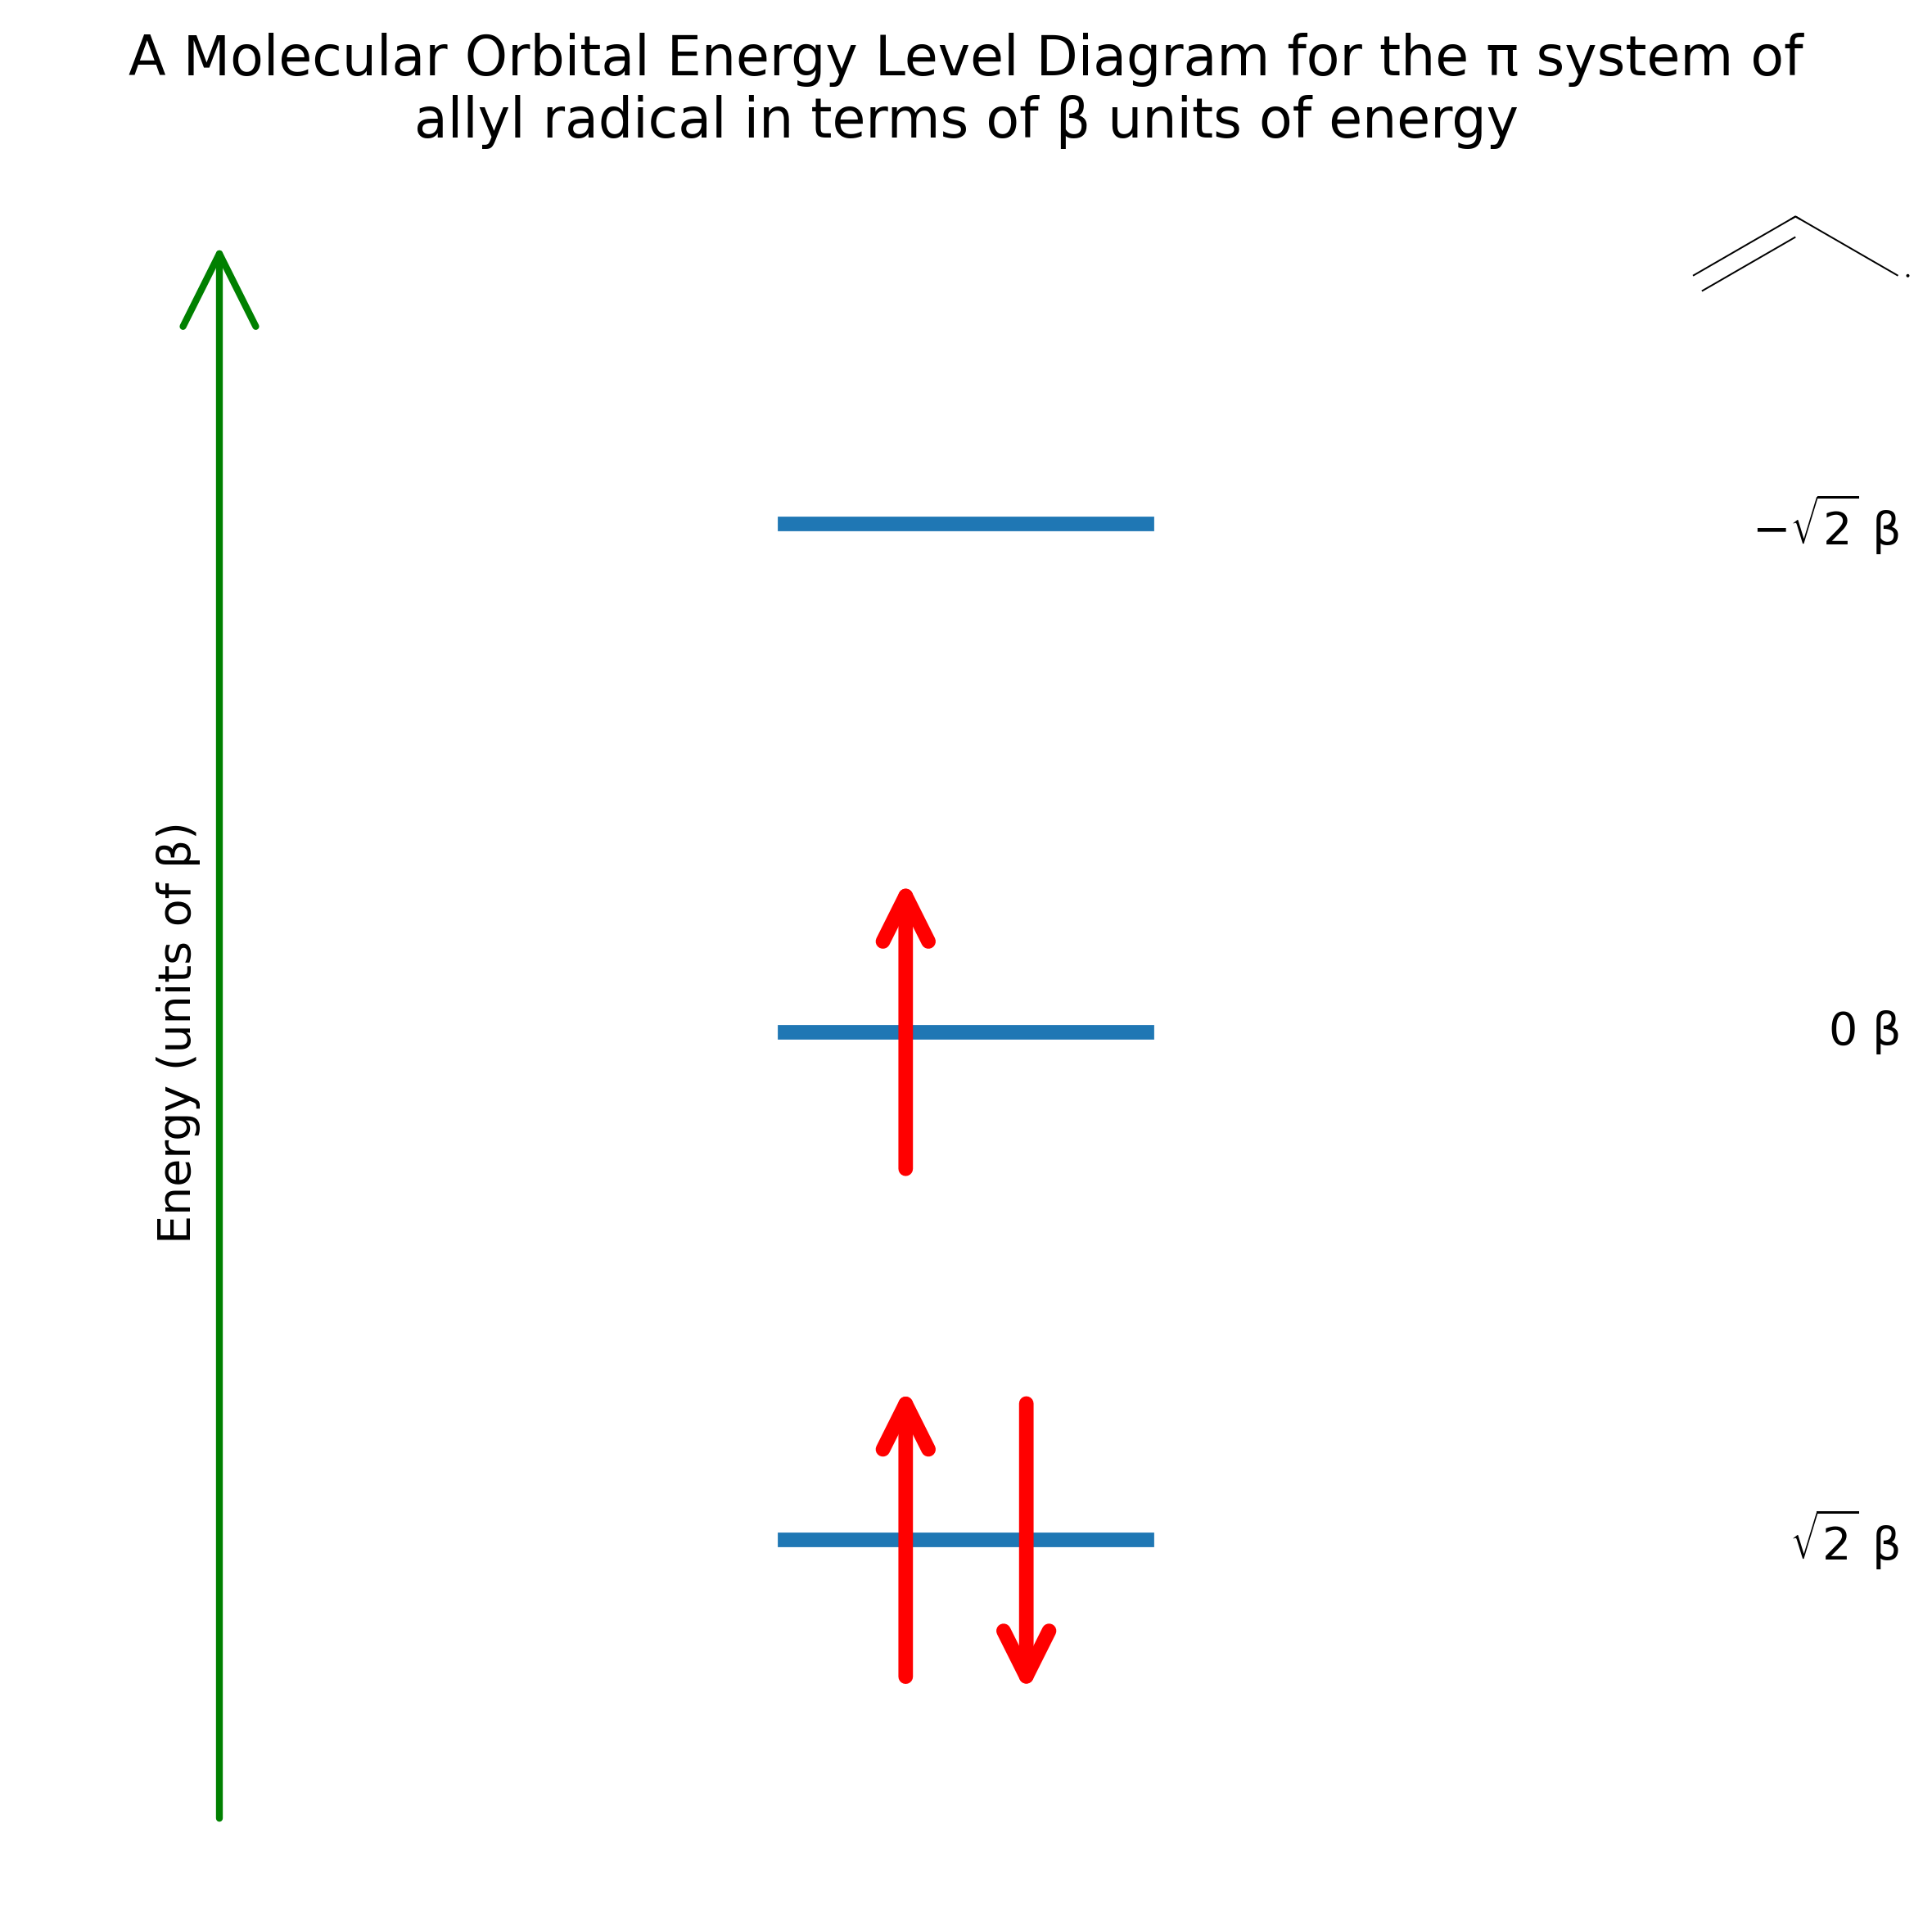

The total π electron energy of allyl radical is:
2.828 β
Which is equal to
-650.537 kJ/mol where β = -230kJ/mol


End of Hückel Molecular Orbital calculations for allyl radical


In [111]:
#runs the Huckel Molecular Orbital calculator for the allyl radical
run_Huckel_MO_calculator("Allyl radical")

Start of Hückel Molecular Orbital calculations for butadiene


Part (A):
The dimensions of the butadiene Hamiltonian matrix are 4 X 4


,1,2,3,4
1,0,1,0,0
2,1,0,1,0
3,0,1,0,1
4,0,0,1,0


Part (B):
The butadiene Hamiltonian matrix is symmetric
The butadiene Hamiltonian matrix diagonal elements only contain zeros


Parts (C) and (D):


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Part (E):


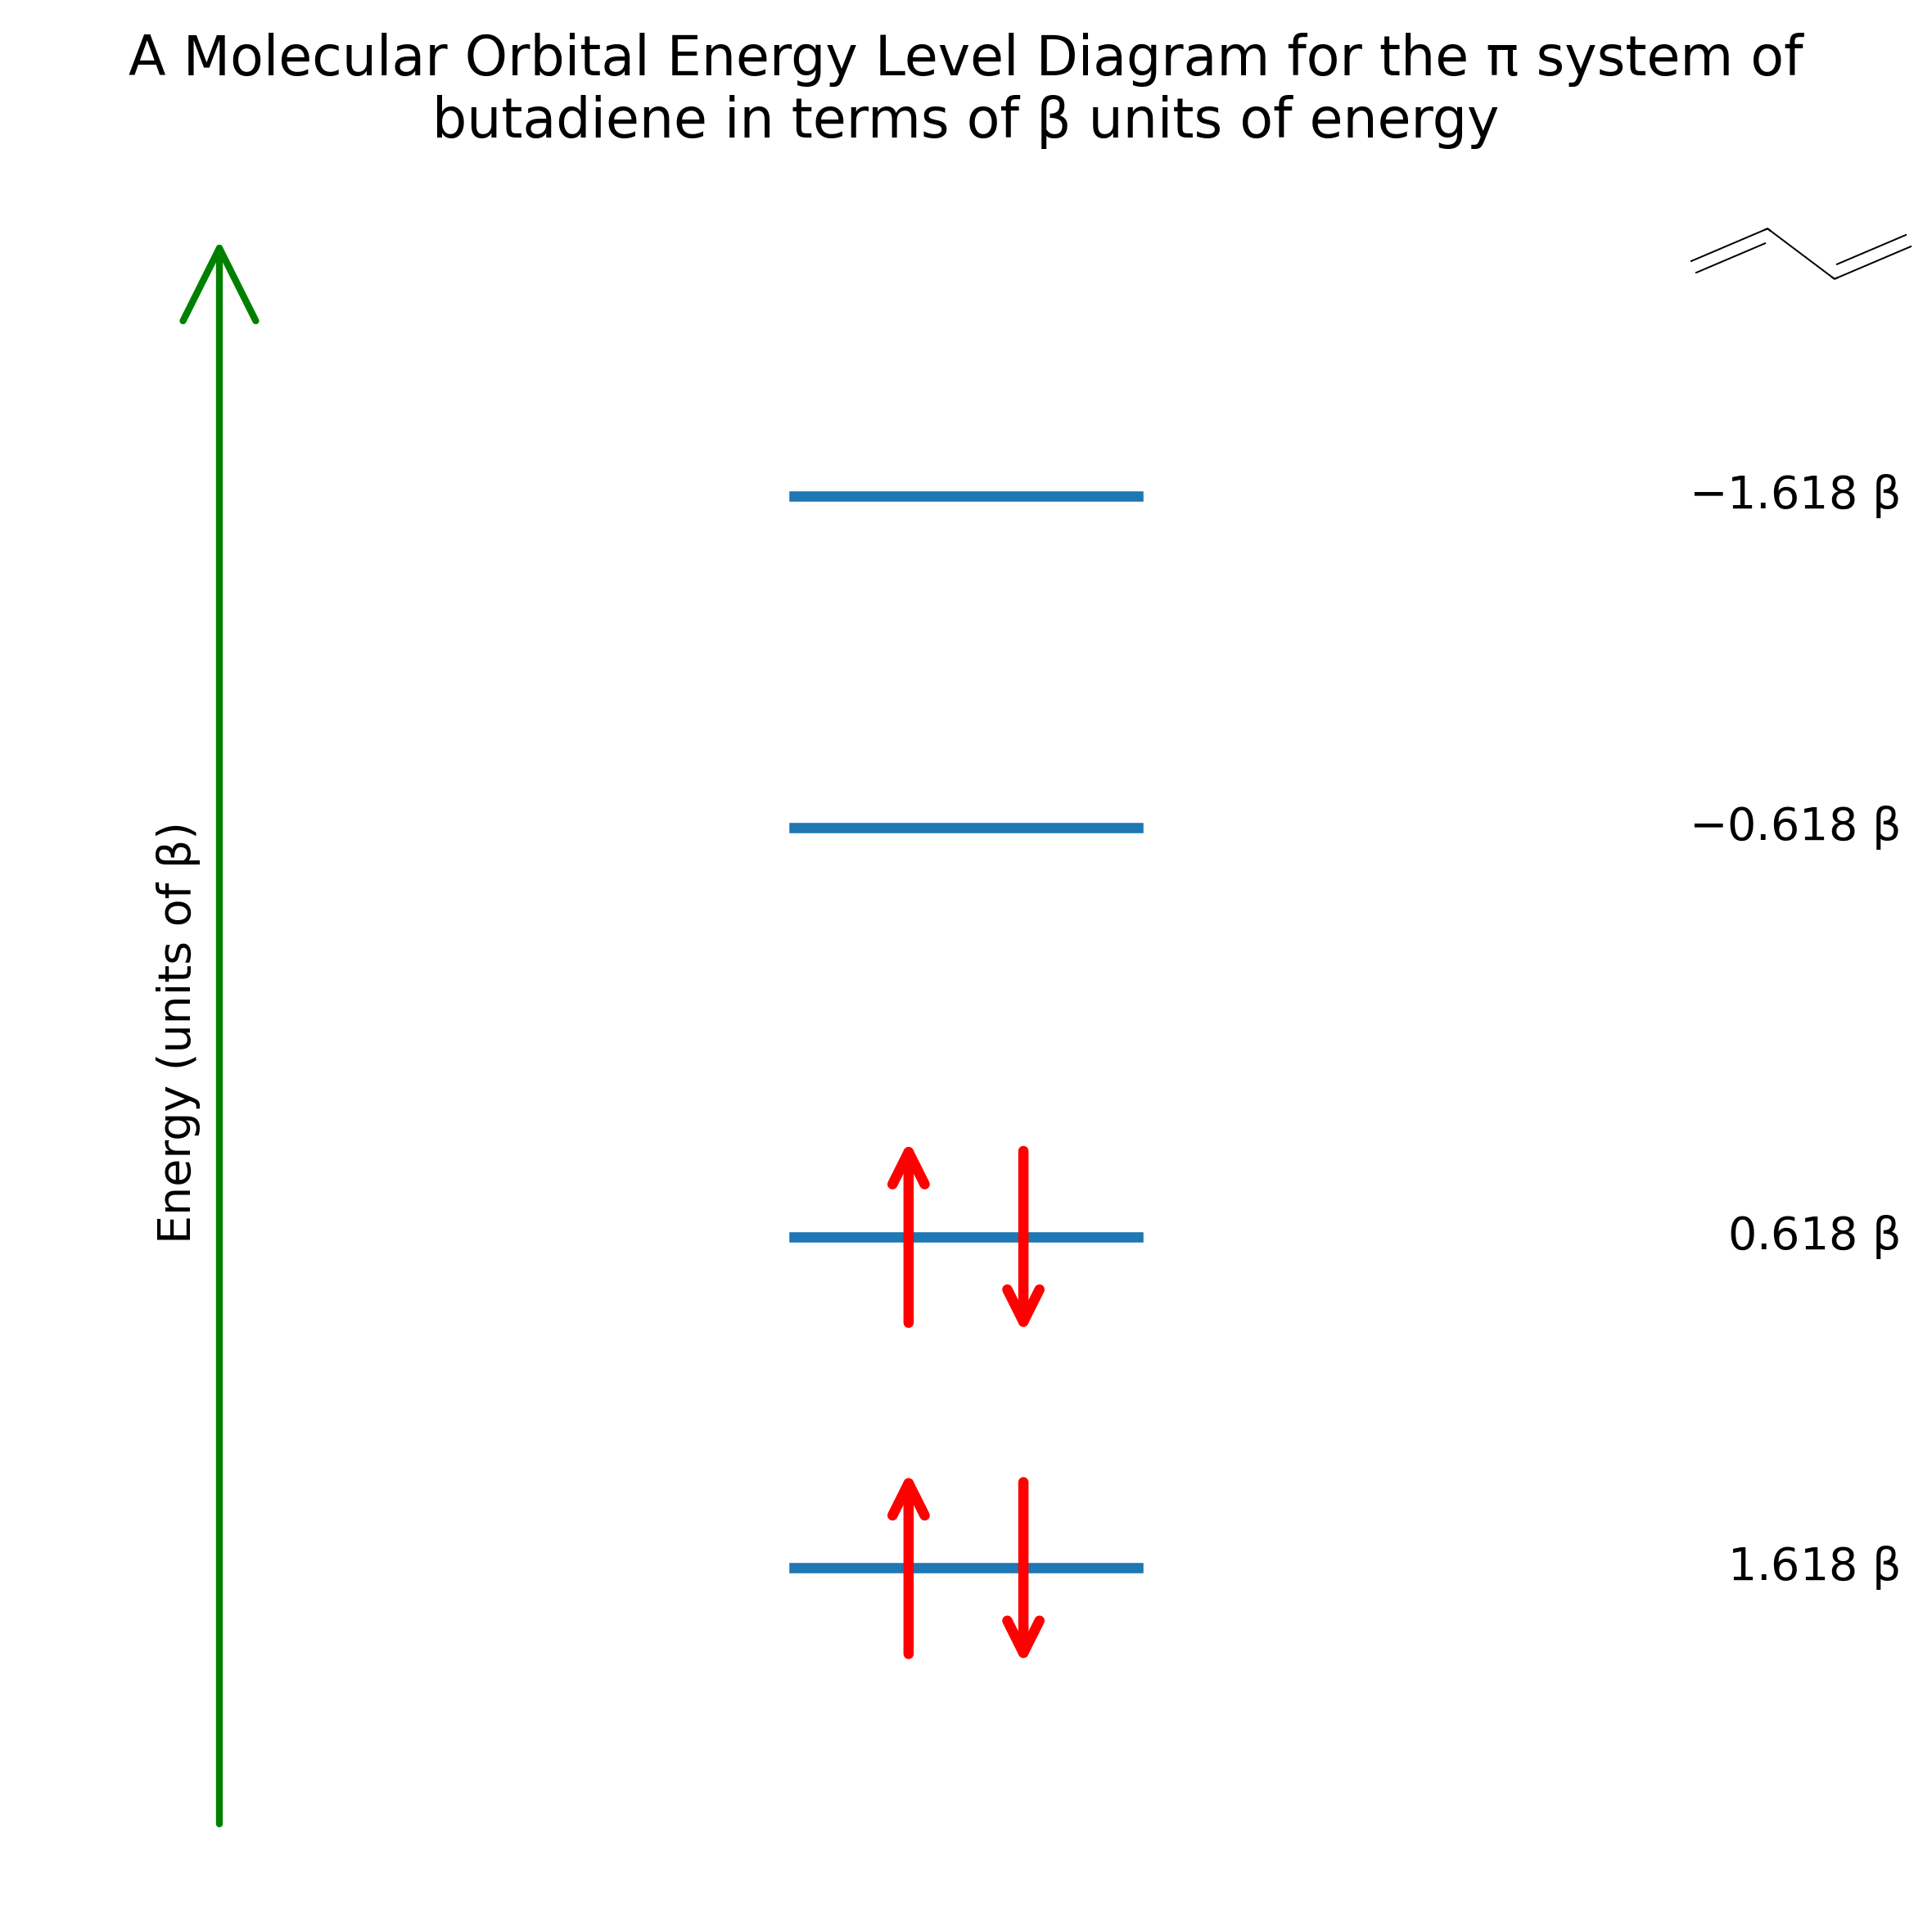

The total π electron energy of butadiene is:
4.472 β
Which is equal to
-1028.588 kJ/mol where β = -230kJ/mol


End of Hückel Molecular Orbital calculations for butadiene


In [112]:
#runs the Huckel Molecular Orbital calculator for butadiene
run_Huckel_MO_calculator("Butadiene")

Start of Hückel Molecular Orbital calculations for cyclopentadienyl


Part (A):
The dimensions of the cyclopentadienyl Hamiltonian matrix are 5 X 5


,1,2,3,4,5
1,0,1,0,0,1
2,1,0,1,0,0
3,0,1,0,1,0
4,0,0,1,0,1
5,1,0,0,1,0


Part (B):
The cyclopentadienyl Hamiltonian matrix is symmetric
The cyclopentadienyl Hamiltonian matrix diagonal elements only contain zeros


Parts (C) and (D):


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Part (E):


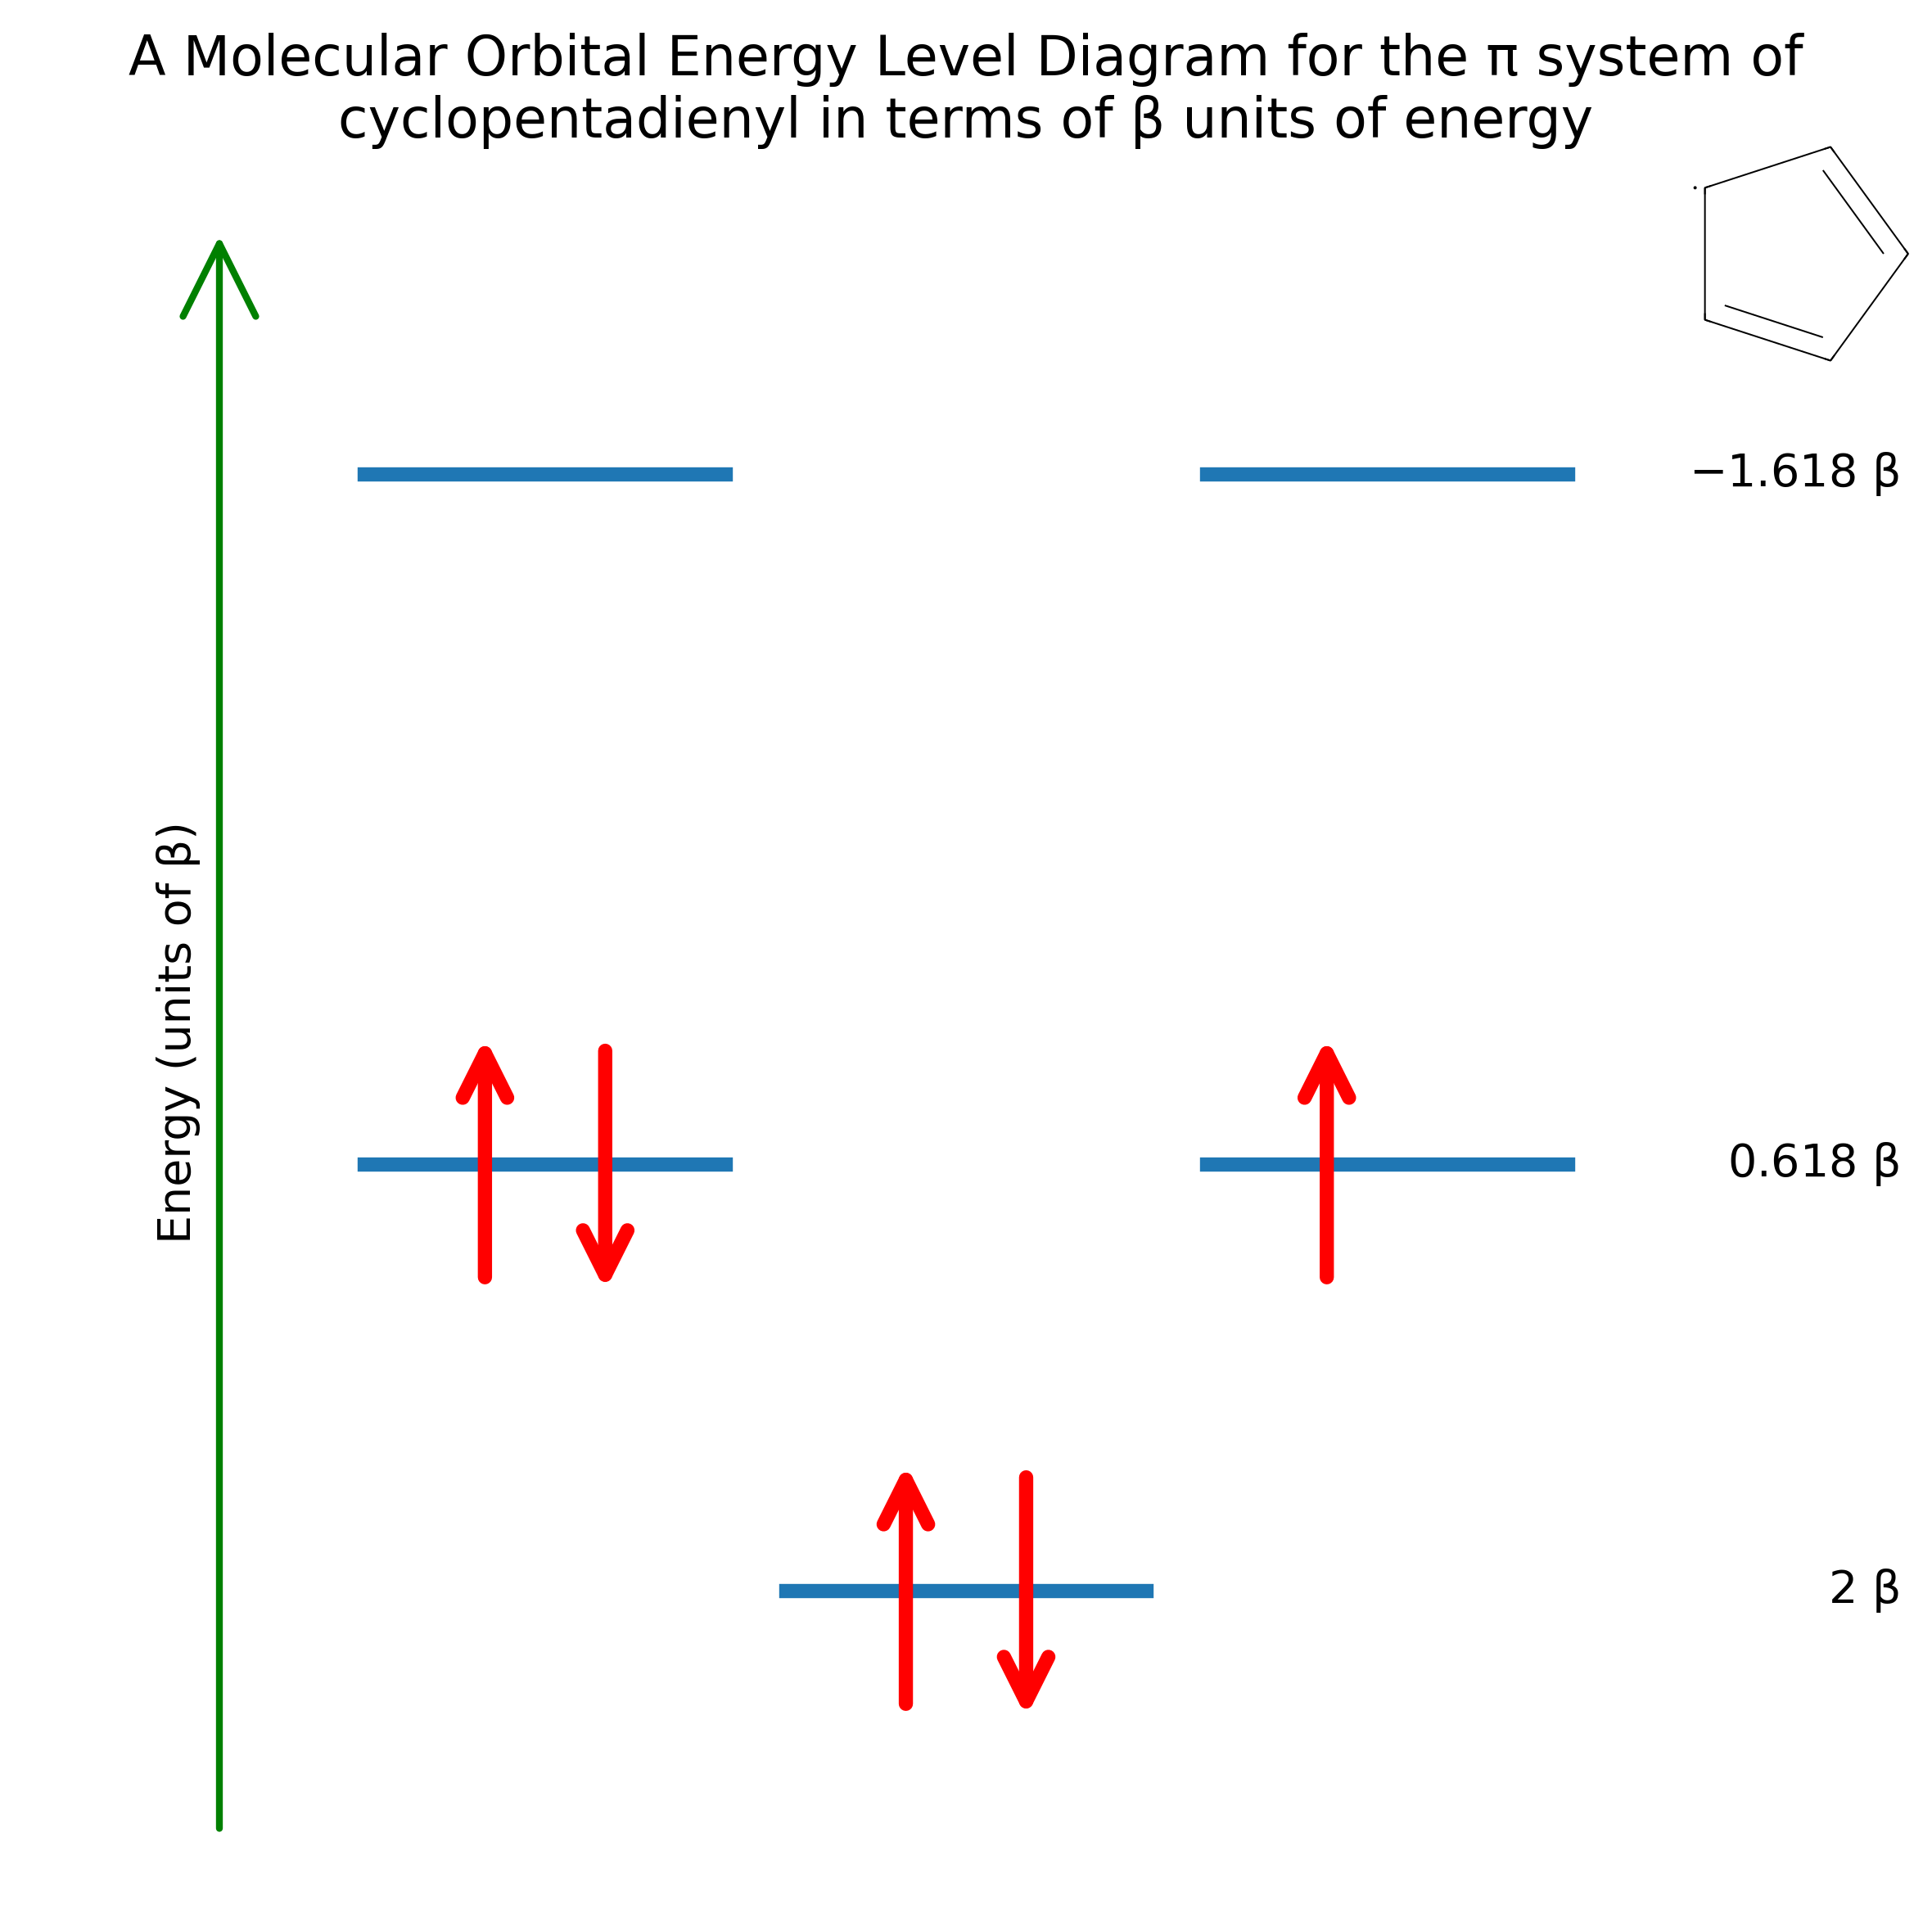

The total π electron energy of cyclopentadienyl is:
5.854 β
Which is equal to
-1346.441 kJ/mol where β = -230kJ/mol


End of Hückel Molecular Orbital calculations for cyclopentadienyl


In [113]:
#runs the Huckel Molecular Orbital calculator for cyclopentadienyl
run_Huckel_MO_calculator("Cyclopentadienyl")

Start of Hückel Molecular Orbital calculations for naphthalene


Part (A):
The dimensions of the naphthalene Hamiltonian matrix are 10 X 10


,1,2,3,4,5,6,7,8,9,10
1,0,1,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,1,0
5,0,0,0,1,0,1,0,0,0,0
6,0,0,0,0,1,0,1,0,0,0
7,0,0,0,0,0,1,0,1,0,0
8,0,0,0,0,0,0,1,0,1,0
9,0,0,0,1,0,0,0,1,0,1
10,1,0,0,0,0,0,0,0,1,0


Part (B):
The naphthalene Hamiltonian matrix is symmetric
The naphthalene Hamiltonian matrix diagonal elements only contain zeros


Parts (C) and (D):


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Part (E):


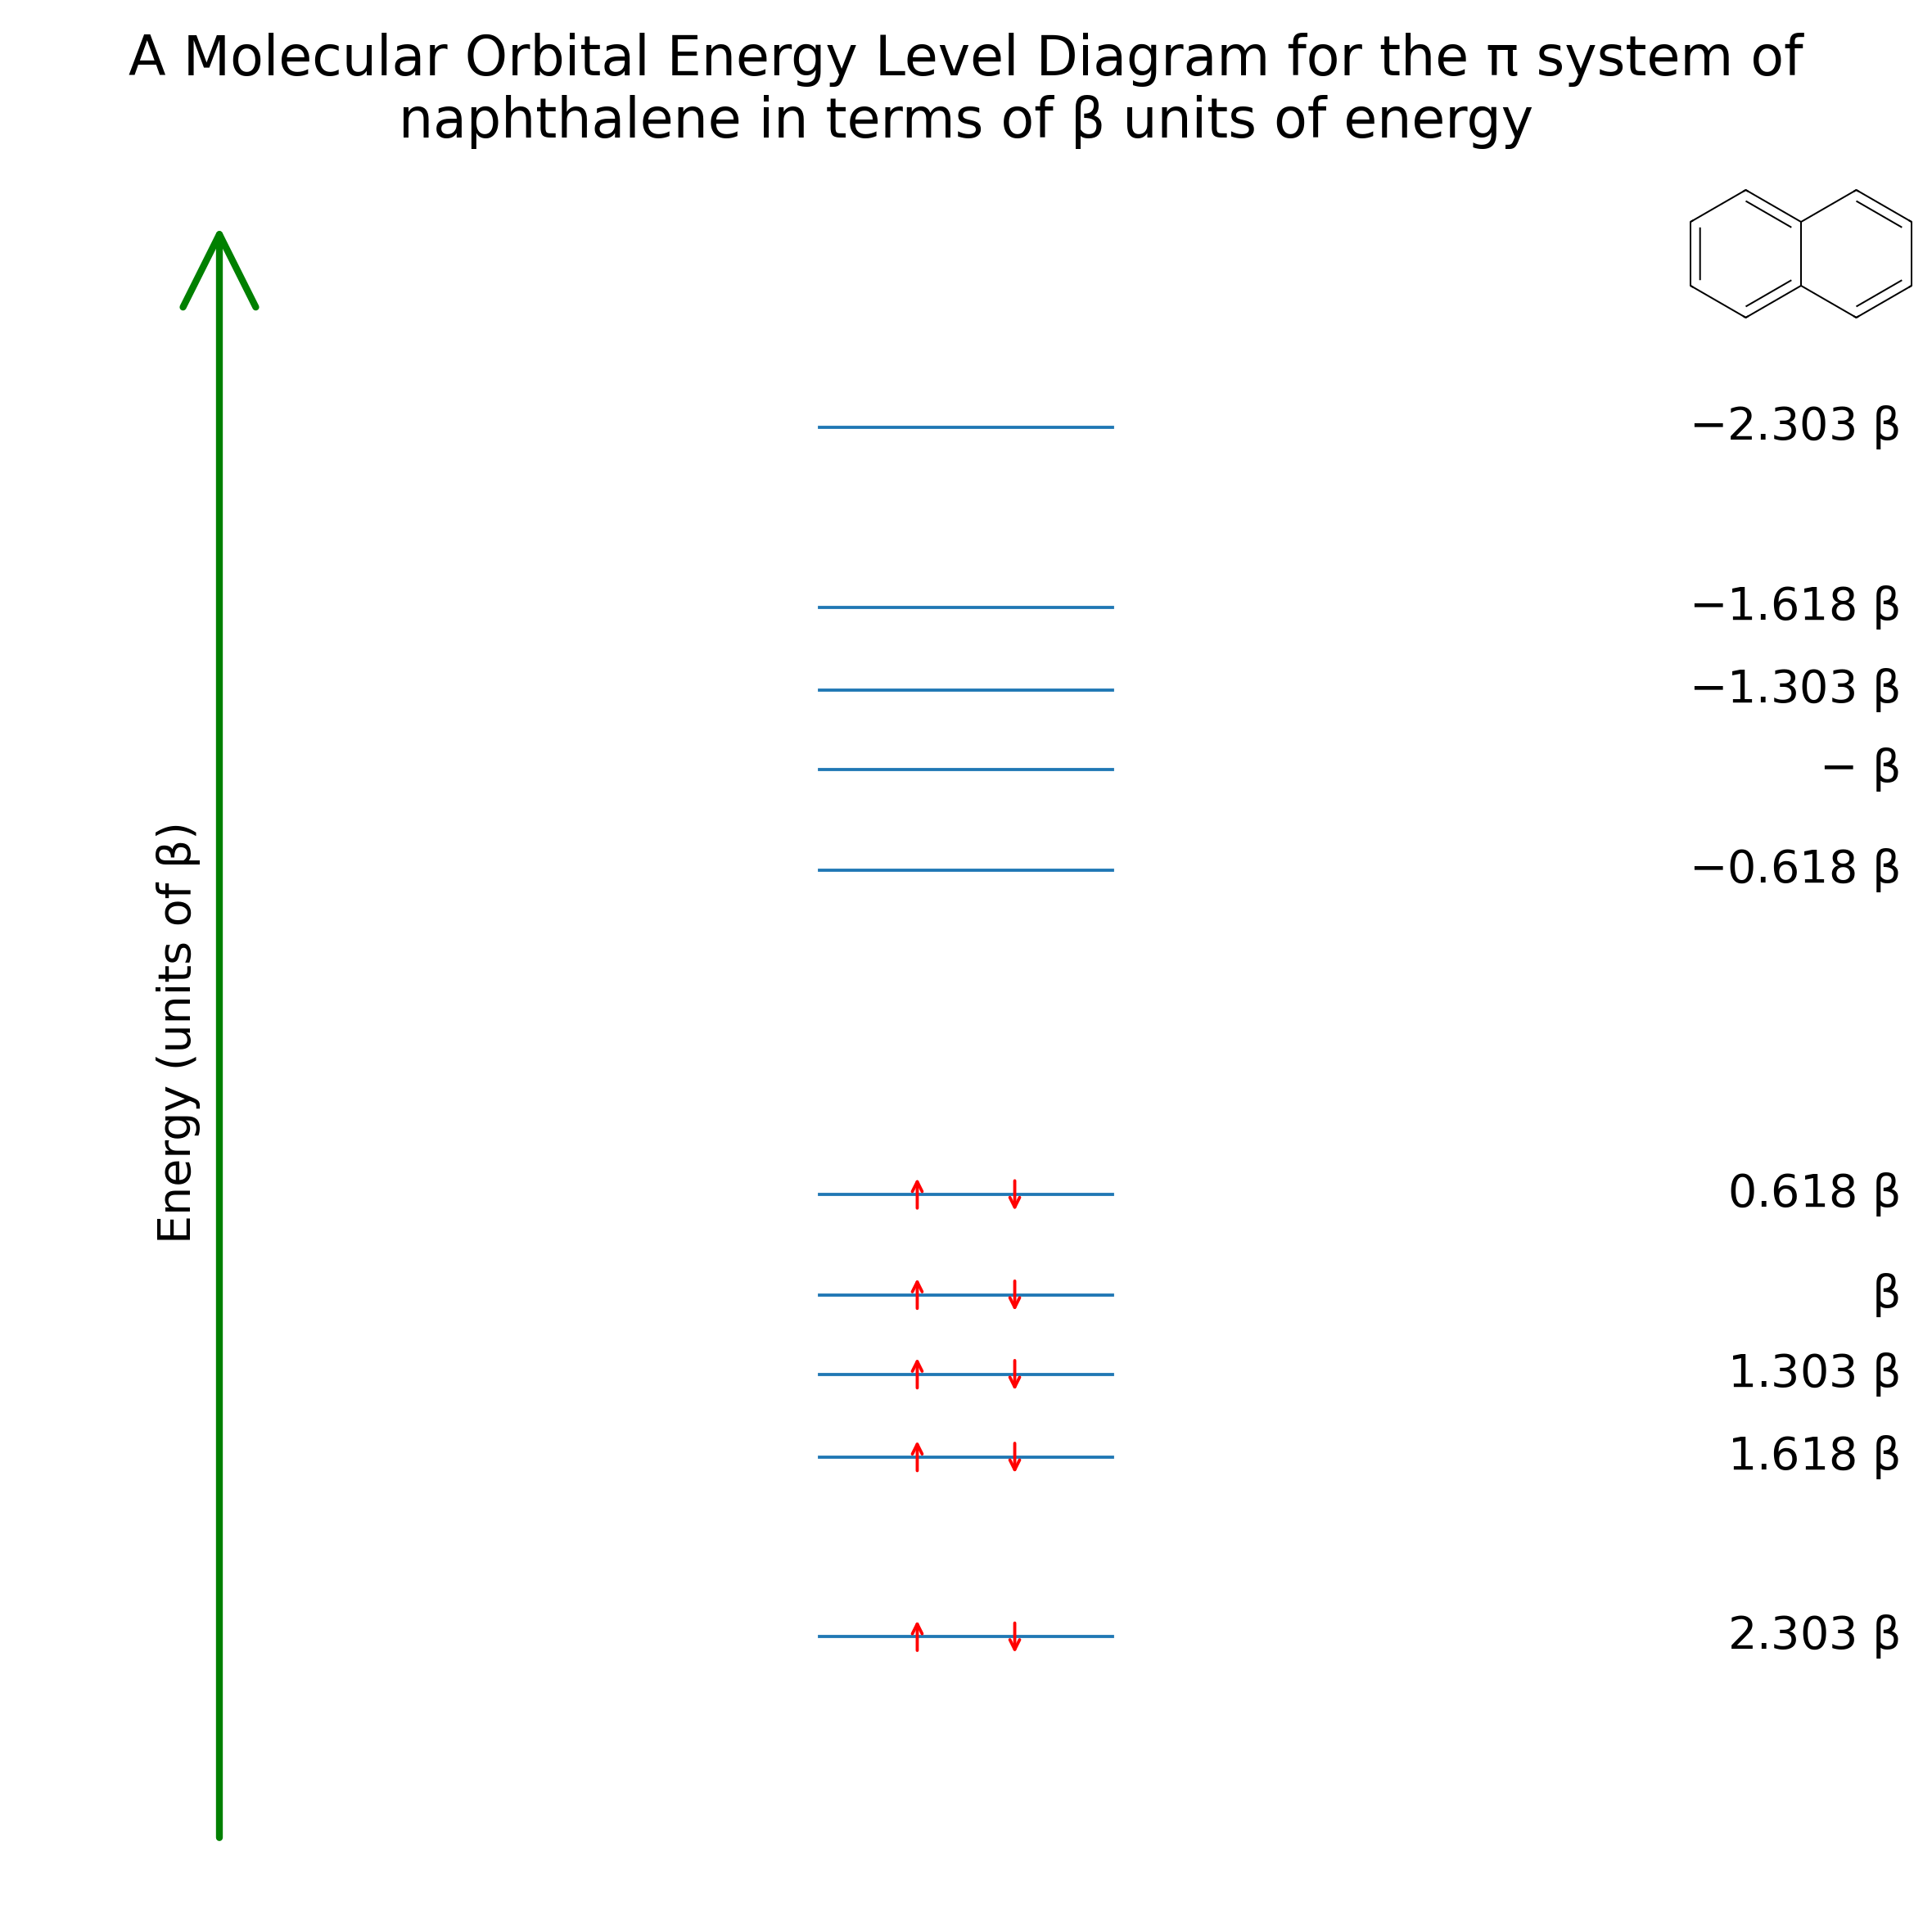

The total π electron energy of naphthalene is:
13.683 β
Which is equal to
-3147.145 kJ/mol where β = -230kJ/mol


End of Hückel Molecular Orbital calculations for naphthalene


In [114]:
#runs the Huckel Molecular Orbital calculator for naphthalene
run_Huckel_MO_calculator("Naphthalene")

---
<p style="text-align: center; font size: 5,">~ ~ ~ End of project ~ ~ ~</p>

---